## Importing the necessary Python Libraries and connecting to the database

In [ ]:
%pip install duckdb

   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.4 MB 10.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.4 MB 10.2 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.4 MB 10.2 MB/s eta 0:00:01
   ----------------------------- ---------- 8.4/11.4 MB 10.4 MB/s eta 0:00:01
   ------------------------------------ --- 10.5/11.4 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 11.4/11.4 MB 10.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import scipy.stats as spst
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import duckdb
pd.set_option('display.max_colwidth', None)

In [ ]:
con = duckdb.connect("yelp.db")

## Analysis Structure
**Section I-** Exploratory Data Analysis<br>
**Section II-** Interpreting the data based on 10 questions<br>
**Section III-** Interval calculation & Hypothesis testing.



## SECTION I - Exploratory Data Analysis
Before we dive into analyzing the datasets, we first need to understand the structures of the different datasets provided to us. This will help set the foundation for meaningful insights.

### Exploring the "restos" table

In [ ]:
df_r = con.sql("""
    SELECT * FROM restos;
""").df()
df_r

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,attributes.Smoking,attributes.DriveThru,attributes.BYOBCorkage,attributes.Corkage,attributes.RestaurantsCounterService,attributes.DietaryRestrictions,attributes.AgesAllowed,attributes.Open24Hours,attributes.AcceptsInsurance,attributes.HairSpecializesIn
0,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,...,None,None,None,None,<NA>,None,None,<NA>,<NA>,None
1,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,...,None,None,None,None,<NA>,None,None,<NA>,<NA>,None
2,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,...,None,None,None,None,<NA>,None,None,<NA>,<NA>,None
3,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,...,None,None,None,None,<NA>,None,None,<NA>,<NA>,None
4,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,...,None,None,None,None,<NA>,None,None,<NA>,<NA>,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48795,Split Dine and Drink,7335 SW Bridgeport Rd,Tigard,OR,97224,45.394457,-122.752535,2.0,48,0,...,None,None,None,None,<NA>,None,None,<NA>,<NA>,None
48796,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,78738,30.304761,-97.937394,3.0,310,1,...,u'no',False,None,None,<NA>,None,None,<NA>,<NA>,None
48797,Mama's Cocina Latina,1958 Piedmont Rd NE,Atlanta,GA,30324,33.810996,-84.367084,3.0,185,1,...,None,True,None,None,<NA>,None,None,<NA>,<NA>,None
48798,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,...,None,None,None,None,<NA>,None,None,<NA>,<NA>,None


In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48800 entries, 0 to 48799
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   name                                   48800 non-null  object 
 1   address                                48378 non-null  object 
 2   city                                   48800 non-null  object 
 3   state                                  48800 non-null  object 
 4   postal_code                            48776 non-null  object 
 5   latitude                               48800 non-null  float64
 6   longitude                              48800 non-null  float64
 7   stars                                  48800 non-null  float64
 8   review_count                           48800 non-null  int64  
 9   is_open                                48800 non-null  int64  
 10  attributes.RestaurantsTableService     18523 non-null  object 
 11  at

In [ ]:
df_r.shape

(48800, 60)

### Exploring the "resto_reviews" table

In [ ]:
df_rr = con.sql("""
    SELECT * FROM resto_reviews;
""").df()
df_rr

,stars,useful,funny,cool,text,date,int_business_id,int_user_id,int_rest_review_id
0,2,1,1,1,I've stayed at many Marriott and Renaissance Marriott's and this was a huge disappointment! The front desk and atrium is nice..there is a starbucks on site which is nice.\n\nThe rooms are run down and old. There is a flat screen but that is to be expected of a Renaissance.\n\nWe got this hotel via Priceline at a rate of $75/night...good deal for the price but this is not a true Renaissance.,2010-01-08 02:29:15,4954,6319642,2
1,2,0,0,0,"The setting is perfectly adequate, and the food comes close. The dining chains like Chilis and Victoria Station do barbecue better.\n\nIt's no surprise you can always pick up coupons for Linwood at restaurant.com.",2006-04-16 02:58:44,14180,292901,5
2,5,0,0,0,"I work in the Pru and this is the most affordable and tasty place in the food court. deals where a meal is $5-$7 and the chicken pesto is really good. I am not a chowda person but all there soups I have had are pretty damn good. Broccoli chicken is my favorite. Also, probably the most personable Food court staff I have ever had the pleasure of ordering from.",2014-05-07 18:10:21,11779,6336225,7
3,5,5,3,3,"I loved everything about this place. I've only been once but I keep meaning to go back as it was so great (just a bit out of my way). \n\nI went with a fairly large group so we'd all ordered something different (back when it was $6 for everything, it looks like they've changed that now). At the time I got the chickpea fries, which were delicious but watch out for the fiber because I had to sit out of an entire board game. The board game selection was great, and I love that they serve mead (though I didn't get any at 12 pm haha). The molten lava chocolate cake was so, so good. Seriously.\n\nThe real topping to the experience (other than the great service and the fact that they put lemons in their complimentary ice water) was that they were playing Siouxsie and the Banshees in the background! That + board games + good food + mead = I'm a fan forever.",2014-02-05 21:09:05,3216,552519,12
4,4,0,0,0,I think their rice dishes are way better than their Pho's. Also I really like their sandwiches and spring rolls. I took a friend who haven't had viennese food ever. He absolutely love it.,2017-05-26 03:05:46,8748,544027,16
...,...,...,...,...,...,...,...,...,...
1674091,5,0,0,0,"Wonderful! We stopped in twice while taking our son to UP. Both the bacon & non-bacon (lol at the name) breakfast sandwiches were delicious. Not being huge poached eggs fans (& eating in our car) we wanted them poached hard. Even though the eggs were pre-made and couldn't be made poached hard, they did offer to try to cook them a little extra. \n\nSecond trip we had a vegan sandwich which was also amazing. Took a croissant a d chocolatetine to go. Also great. Now sitting here in the airport with an adorable box of cookies to bring home for the daughter who didn't get to come along. \n\nWe will definitely be back.",2021-01-20 20:07:19,152737,20080419,5574787
1674092,5,2,1,2,"This place is a wonderland of Asian delight. It's literally a one stop shop for all things Asian. My family loves to come here and explore and buy snacks, spices and groceries. The great thing about this is there's also a wonderful bakery and a food court. The food court has Japanese, Korean, Filipino, and Chinese food. There's a boba place too. We had food at The Filipino place called Taglish. The food was was great. Besides the food court, there are a lot of plants, fresh produce, prepared foods, fresh fish( I mean the fishes eyes were clear and bright) and meats. The freezer section is filled with great finds too. We really enjoy browsing and picking up some prepared foods. We got done little while fried crabs which are my fave. Deep fried little crunchy crabs you can pop in your mouth. We got some fried squid and some scallion and potato pancakes as well. You should check it out. I guarantee you'll find somethi

In [ ]:
df_rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674096 entries, 0 to 1674095
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   stars               1674096 non-null  int64         
 1   useful              1674096 non-null  int64         
 2   funny               1674096 non-null  int64         
 3   cool                1674096 non-null  int64         
 4   text                1674096 non-null  object        
 5   date                1674096 non-null  datetime64[us]
 6   int_business_id     1674096 non-null  int64         
 7   int_user_id         1674096 non-null  int64         
 8   int_rest_review_id  1674096 non-null  int64         
dtypes: datetime64[us](1), int64(7), object(1)
memory usage: 115.0+ MB


In [ ]:
df_rr.shape

(1674096, 9)

### Exploring the "users" table

In [ ]:
df_u = con.sql("""
    SELECT * FROM users;
""").df()
df_u

,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,int_user_id
0,1220,2005-03-14 20:26:35,15038,10030,11291,"2006,2007,2008,2009,2010,2011,2012,2013,2014",1357,3.85,1710,163,190,361,147,1212,5691,2541,2541,815,323,1
1,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,20,20",1025,4.09,1632,87,94,232,96,1187,3293,2205,2205,472,294,1248
2,119,2007-02-07 15:47:53,188,128,130,"2010,2011",16,3.76,22,1,3,0,0,5,20,31,31,3,1,11604
3,987,2009-02-09 16:14:29,7234,4722,4035,"2009,2010,2011,2012,2013,2014",420,3.77,1180,129,93,219,90,1120,4510,1566,1566,391,326,2278
4,495,2008-03-03 04:57:05,1577,727,1124,"2009,2010,2011",47,3.72,248,19,32,16,15,77,131,310,310,98,44,13481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189452,1,2018-08-25 23:07:58,0,1,0,None,0,1.00,0,0,0,0,0,0,0,0,0,0,0,20427579
2189453,3,2013-08-17 23:58:29,0,0,0,None,0,4.33,0,0,0,0,0,0,0,0,0,0,0,20427580
2189454,10,2012-10-14 23:35:51,3,0,2,None,0,4.20,0,0,0,0,0,0,1,0,0,0,0,20427581
2189455,9,2016-03-24 11:54:52,4,2,0,None,0,3.89,0,0,0,0,0,0,0,0,0,0,0,20427582


In [ ]:
df_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189457 entries, 0 to 2189456
Data columns (total 20 columns):
 #   Column              Dtype         
---  ------              -----         
 0   review_count        int64         
 1   yelping_since       datetime64[us]
 2   useful              int64         
 3   funny               int64         
 4   cool                int64         
 5   elite               object        
 6   fans                int64         
 7   average_stars       float64       
 8   compliment_hot      int64         
 9   compliment_more     int64         
 10  compliment_profile  int64         
 11  compliment_cute     int64         
 12  compliment_list     int64         
 13  compliment_note     int64         
 14  compliment_plain    int64         
 15  compliment_cool     int64         
 16  compliment_funny    int64         
 17  compliment_writer   int64         
 18  compliment_photos   int64         
 19  int_user_id         int64         
dtypes:

In [ ]:
df_u.shape

(2189457, 20)

### Exploring the "user_friends" table

In [ ]:
df_uf = con.sql("""
    SELECT * FROM user_friends;
""").df()
df_uf

,int_user_id,num_friends
0,1,5813
1,1248,6296
2,11604,835
3,2278,1452
4,13481,532
...,...,...
2189452,20427579,0
2189453,20427580,0
2189454,20427581,0
2189455,20427582,0


In [ ]:
df_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189457 entries, 0 to 2189456
Data columns (total 2 columns):
 #   Column       Dtype
---  ------       -----
 0   int_user_id  int64
 1   num_friends  int64
dtypes: int64(2)
memory usage: 33.4 MB


In [ ]:
df_uf.shape

(2189457, 2)

### Primary And Foreign Key Identification
Based on the above EDA we can identify that the datasets are connected in the following manner.

- df_r(restos) ⟷ df_rr(resto_reviews) ⇒ [on int_business_id]
- df_rr(resto_reviews) ⟷ df_u(users) ⟷ df_uf(user_friends) ⇒ [on int_user_id]



### Identifying null values

#### Restos

In [ ]:
df_r.isnull().sum().sort_values(ascending=False)

attributes                               48800
hours                                    48800
attributes.HairSpecializesIn             48797
attributes.AcceptsInsurance              48792
attributes.AgesAllowed                   48781
attributes.Open24Hours                   48768
attributes.RestaurantsCounterService     48760
attributes.DietaryRestrictions           48733
attributes.Smoking                       45555
attributes.BYOB                          45553
attributes.ByAppointmentOnly             45387
attributes.BYOBCorkage                   45287
attributes.GoodForDancing                45216
attributes.Corkage                       45046
attributes.CoatCheck                     44937
attributes.BestNights                    44616
attributes.DriveThru                     44218
attributes.Music                         43576
attributes.BusinessAcceptsBitcoin        42848
attributes.DogsAllowed                   37729
attributes.WheelchairAccessible          36172
attributes.Ha

#### Resto_Reviews

In [ ]:
df_rr.isnull().sum().sort_values(ascending=False)

stars                 0
useful                0
funny                 0
cool                  0
text                  0
date                  0
int_business_id       0
int_user_id           0
int_rest_review_id    0
dtype: int64

#### Users

In [ ]:
df_u.isnull().sum().sort_values(ascending=False)

elite                 2094043
review_count                0
compliment_cute             0
compliment_photos           0
compliment_writer           0
compliment_funny            0
compliment_cool             0
compliment_plain            0
compliment_note             0
compliment_list             0
compliment_profile          0
yelping_since               0
compliment_more             0
compliment_hot              0
average_stars               0
fans                        0
cool                        0
funny                       0
useful                      0
int_user_id                 0
dtype: int64

#### User_Friends

In [ ]:
df_uf.isnull().sum().sort_values(ascending=False)

int_user_id    0
num_friends    0
dtype: int64

### EDA By Dataset


--- Reviews ---
Shape: (1674096, 9)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674096 entries, 0 to 1674095
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   stars               1674096 non-null  int64         
 1   useful              1674096 non-null  int64         
 2   funny               1674096 non-null  int64         
 3   cool                1674096 non-null  int64         
 4   text                1674096 non-null  object        
 5   date                1674096 non-null  datetime64[us]
 6   int_business_id     1674096 non-null  int64         
 7   int_user_id         1674096 non-null  int64         
 8   int_rest_review_id  1674096 non-null  int64         
dtypes: datetime64[us](1), int64(7), object(1)
memory usage: 115.0+ MB
None
Missing Values:
stars                 0
useful                0
funny                 0
cool                  0
text               

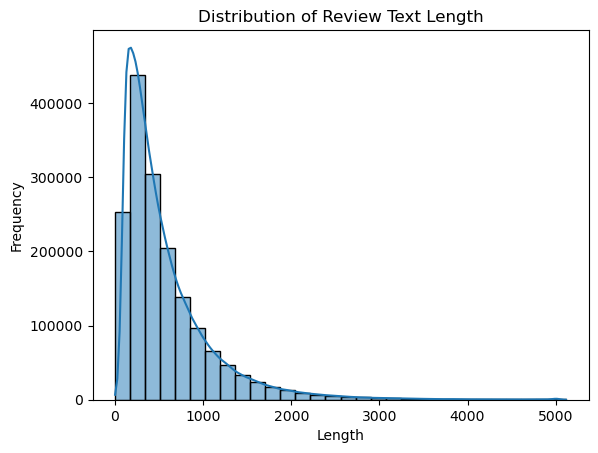

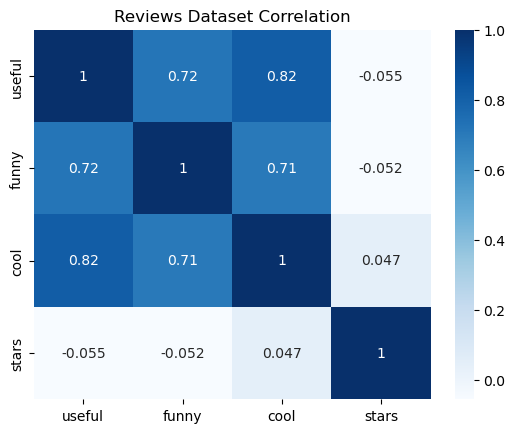


--- Restaurants ---
Shape: (48800, 60)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48800 entries, 0 to 48799
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   name                                   48800 non-null  object 
 1   address                                48378 non-null  object 
 2   city                                   48800 non-null  object 
 3   state                                  48800 non-null  object 
 4   postal_code                            48776 non-null  object 
 5   latitude                               48800 non-null  float64
 6   longitude                              48800 non-null  float64
 7   stars                                  48800 non-null  float64
 8   review_count                           48800 non-null  int64  
 9   is_open                                48800 non-null  int64  
 10  attributes.RestaurantsTa

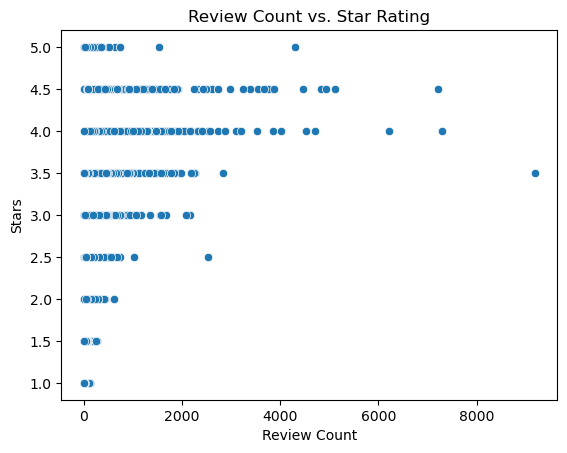


--- Users ---
Shape: (2189457, 20)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189457 entries, 0 to 2189456
Data columns (total 20 columns):
 #   Column              Dtype         
---  ------              -----         
 0   review_count        int64         
 1   yelping_since       datetime64[us]
 2   useful              int64         
 3   funny               int64         
 4   cool                int64         
 5   elite               object        
 6   fans                int64         
 7   average_stars       float64       
 8   compliment_hot      int64         
 9   compliment_more     int64         
 10  compliment_profile  int64         
 11  compliment_cute     int64         
 12  compliment_list     int64         
 13  compliment_note     int64         
 14  compliment_plain    int64         
 15  compliment_cool     int64         
 16  compliment_funny    int64         
 17  compliment_writer   int64         
 18  compliment_photos   int64         
 19  

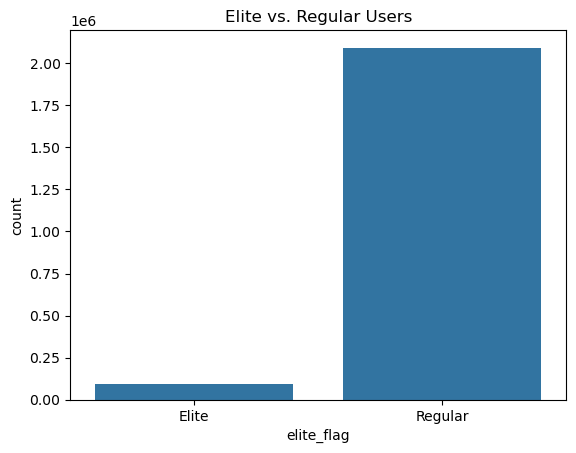

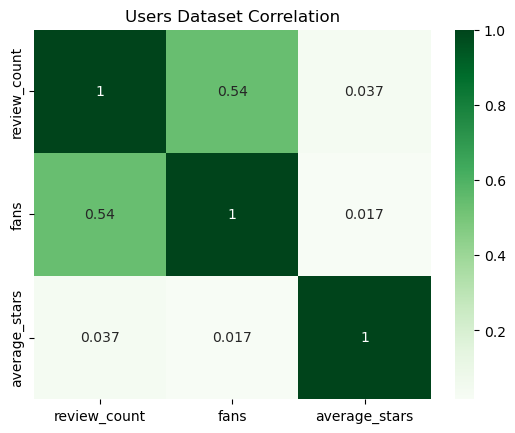


--- User Friends ---
Shape: (2189457, 2)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189457 entries, 0 to 2189456
Data columns (total 2 columns):
 #   Column       Dtype
---  ------       -----
 0   int_user_id  int64
 1   num_friends  int64
dtypes: int64(2)
memory usage: 33.4 MB
None
Missing Values:
int_user_id    0
num_friends    0
dtype: int64
Summary Statistics:
        int_user_id   num_friends
count  2.189457e+06  2.189457e+06
mean   1.077407e+07  5.256325e+01
std    6.733030e+06  1.430394e+02
min    1.000000e+00  0.000000e+00
25%    4.347112e+06  0.000000e+00
50%    1.189263e+07  2.000000e+00
75%    1.675606e+07  4.500000e+01
max    2.042758e+07  1.499500e+04


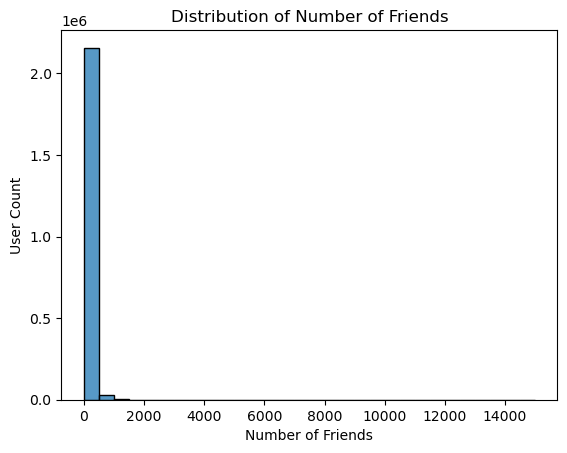

In [ ]:
# ======== Helper Function ======== for easier analysis
def basic_eda(df, name):
    print(f'\n--- {name} ---')
    print("Shape:", df.shape)
    print("Info:")
    print(df.info())
    print("Missing Values:")
    print(df.isnull().sum().sort_values(ascending=False))
    print("Summary Statistics:")
    print(df.describe(include='all'))

# ======== EDA for Resto_Reviews ========
basic_eda(df_rr, "Reviews")
df_rr['text_length'] = df_rr['text'].str.len()

# Plot review text length
sns.histplot(df_rr['text_length'], bins=30, kde=True)
plt.title("Distribution of Review Text Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap for vote metrics
sns.heatmap(df_rr[['useful', 'funny', 'cool', 'stars']].corr(), annot=True, cmap='Blues')
plt.title("Reviews Dataset Correlation")
plt.show()

# ======== EDA for Restos ========
basic_eda(df_r, "Restaurants")
bool_cols = [col for col in df_r.columns if df_r[col].dropna().astype(str).isin(['True','False','Yes','No']).any()]
print("\nBoolean Attribute Frequencies:")
for col in bool_cols[:10]:  # show just a few for clarity
    print(f"{col}:\n", df_r[col].value_counts())

# Plot review_count vs. stars
sns.scatterplot(data=df_r, x='review_count', y='stars')
plt.title("Review Count vs. Star Rating")
plt.xlabel("Review Count")
plt.ylabel("Stars")
plt.show()

# ======== EDA for Users ========
basic_eda(df_u, "Users")
df_u['elite_flag'] = df_u['elite'].apply(lambda x: 'Elite' if pd.notnull(x) and x != '' else 'Regular')

# Elite distribution
sns.countplot(data=df_u, x='elite_flag')
plt.title("Elite vs. Regular Users")
plt.show()

# Correlation heatmap
sns.heatmap(df_u[['review_count', 'fans', 'average_stars']].corr(), annot=True, cmap='Greens')
plt.title("Users Dataset Correlation")
plt.show()

# ======== EDA for User_Friends ========
basic_eda(df_uf, "User Friends")
sns.histplot(df_uf['num_friends'], bins=30)
plt.title("Distribution of Number of Friends")
plt.xlabel("Number of Friends")
plt.ylabel("User Count")
plt.show()

## SECTION II - Interpreting the data by asking questions

**For the purpose of this analysis, we have framed 10 questions that we we wish to answer based on the provided datasets.** <br>
1. What business features are most associated with higher restaurant ratings?
2. Do user characteristics (review_count, fans, elite status) influence how generously they rate restaurants?
3. Which cities or states have the highest average restaurant ratings, and how do they compare in terms of number of reviews?
4. Do restaurants that offer delivery or reservations tend to receive better ratings?
5. Are longer reviews associated with more useful/funny/cool votes?
6. Are reviews written by users with more friends more likely to get useful/funny/cool votes?
7. What are the busiest hours/days for restaurants and do those hours correlate with higher reviews?
8. What features are common among restaurants with both high ratings and high review counts (i.e. most popular & most liked)?
9. How has the average sentiment or star rating of reviews changed over time across states?
10. Are elite users more generous or harsher reviewers than regular users?

### 1. What business features are most associated with higher restaurant ratings?

In [ ]:
# Create a copy of the dataframe to avoid modifying the original
df_cleaned = df_r.copy()

# List of attributes to analyze
attribute_columns = [
    'attributes.RestaurantsTableService', 'attributes.WiFi', 'attributes.BikeParking',
    'attributes.BusinessAcceptsCreditCards', 'attributes.RestaurantsReservations',
    'attributes.WheelchairAccessible', 'attributes.Caters', 'attributes.OutdoorSeating',
    'attributes.RestaurantsGoodForGroups', 'attributes.HappyHour', 'attributes.HasTV',
    'attributes.Alcohol', 'attributes.RestaurantsPriceRange2'
]

# Define the mapping for boolean-like strings
bool_map = {'True': 'Yes', 'False': 'No'}

# Loop through each attribute to clean it and then analyze
for attr in attribute_columns:
    # --- Data Cleaning Step ---
    if df_cleaned[attr].dtype == 'object':
        # Clean string values like u'free' to 'free'
        df_cleaned[attr] = df_cleaned[attr].str.replace("u'", "").str.replace("'", "")

        # **FUTURE-PROOF FIX**: Assign the result of the replacement back to the column
        df_cleaned[attr] = df_cleaned[attr].replace(bool_map)

    # --- Analysis Step ---
    clean_attr_name = attr.replace('attributes.', '').replace('Restaurants', '')
    print(f"### Analysis for: {clean_attr_name} ###")

    # Filter out non-informative 'None' string values and standard nulls
    filtered_df = df_cleaned[df_cleaned[attr].notna() & (df_cleaned[attr] != 'None')]

    if not filtered_df.empty:
        # Group by the cleaned values and aggregate
        analysis_df = filtered_df.groupby(attr)['stars'].agg(['mean', 'count']).round(2).sort_values(by='mean', ascending=False)
        display(analysis_df)
    else:
        print("No data available for this attribute.")

    print("\n" + "---" + "\n")

### Analysis for: TableService ###


,mean,count
attributes.RestaurantsTableService,,
No,3.79,7684
Yes,3.72,10832



---

### Analysis for: WiFi ###


,mean,count
attributes.WiFi,,
free,3.59,20490
no,3.54,16100
paid,3.28,265



---

### Analysis for: BikeParking ###


,mean,count
attributes.BikeParking,,
Yes,3.63,26287
No,3.37,7413



---

### Analysis for: BusinessAcceptsCreditCards ###


,mean,count
attributes.BusinessAcceptsCreditCards,,
No,3.87,1114
Yes,3.53,38435



---

### Analysis for: Reservations ###


,mean,count
attributes.RestaurantsReservations,,
Yes,3.58,14281
No,3.47,27596



---

### Analysis for: WheelchairAccessible ###


,mean,count
attributes.WheelchairAccessible,,
No,3.98,891
Yes,3.87,11732



---

### Analysis for: Caters ###


,mean,count
attributes.Caters,,
Yes,3.66,18474
No,3.46,14774



---

### Analysis for: OutdoorSeating ###


,mean,count
attributes.OutdoorSeating,,
Yes,3.64,19858
No,3.39,20619



---

### Analysis for: GoodForGroups ###


,mean,count
attributes.RestaurantsGoodForGroups,,
Yes,3.49,34547
No,3.45,6394



---

### Analysis for: HappyHour ###


,mean,count
attributes.HappyHour,,
No,3.89,4525
Yes,3.64,8248



---

### Analysis for: HasTV ###


,mean,count
attributes.HasTV,,
No,3.76,12409
Yes,3.44,27551



---

### Analysis for: Alcohol ###


,mean,count
attributes.Alcohol,,
beer_and_wine,3.70,7398
full_bar,3.52,13706
none,3.49,18314



---

### Analysis for: PriceRange2 ###


,mean,count
attributes.RestaurantsPriceRange2,,
4,3.72,233
3,3.63,1709
2,3.54,21540
1,3.41,19665



---



### 2. Do user characteristics influence how generously they rate?

In [ ]:
# Select user features for correlation analysis
user_features = df_u[['average_stars', 'review_count', 'fans', 'useful', 'funny', 'cool']]

# Calculate the correlation with 'average_stars'
correlation_series = user_features.corr()['average_stars'].drop('average_stars')

def interpret_correlation(value):
    """Translates a correlation coefficient into a simple English sentence."""
    abs_value = abs(value)

    if abs_value >= 0.3:
        # This threshold is high and unlikely to be met here
        strength = 'a moderate'
    elif abs_value >= 0.1:
        strength = 'a weak'
    else:
        # Acknowledge the tiny positive trend but state its insignificance
        return "A **statistically negligible** link. This has no real-world impact on a user's ratings."

    # This part of the code is kept for completeness but is not expected to be triggered
    if value > 0:
        direction = "positive"
        tendency = "give slightly higher ratings"
    else:
        direction = "negative"
        tendency = "give slightly lower ratings"

    return f"There is {strength} {direction} relationship. Users with more of this trait {tendency}."

# Create the final DataFrame with the correlation value included
interpreted_df = pd.DataFrame({
    'User Characteristic': correlation_series.index,
    'Correlation Value': correlation_series.values.round(4), # Rounded for readability
    'Interpretation': [interpret_correlation(v) for v in correlation_series]
})

print("How a User's Stats Relate to the Ratings They Give Out:")
display(interpreted_df.sort_values(by='Correlation Value', ascending=False))

How a User's Stats Relate to the Ratings They Give Out:


,User Characteristic,Correlation Value,Interpretation
0,review_count,0.0368,A **statistically negligible** link. This has no real-world impact on a user's ratings.
1,fans,0.0171,A **statistically negligible** link. This has no real-world impact on a user's ratings.
4,cool,0.0092,A **statistically negligible** link. This has no real-world impact on a user's ratings.
2,useful,0.0088,A **statistically negligible** link. This has no real-world impact on a user's ratings.
3,funny,0.0057,A **statistically negligible** link. This has no real-world impact on a user's ratings.


### 3. Which cities or states have the highest average restaurant ratings

--- Top 10 States by Average Restaurant Rating (min. 50 restaurants) ---


,state,avg_rating,total_reviews
0,OR,3.752074,859980.0
1,TX,3.656262,803482.0
2,CO,3.587216,85653.0
3,FL,3.521030,715153.0
4,MA,3.480819,1269690.0
5,BC,3.454463,395923.0
6,WA,3.450202,65544.0
7,OH,3.421853,277118.0
8,GA,3.399796,739207.0



--- Top 10 Cities by Average Restaurant Rating (min. 30 restaurants) ---


,location,avg_rating,total_reviews
0,"Portland, OR",3.825222,708889.0
1,"Winthrop, MA",3.800000,2996.0
2,"Maitland, FL",3.770492,4647.0
3,"Oregon City, OR",3.766129,5766.0
4,"Marblehead, MA",3.762295,2971.0
5,"Longwood, FL",3.755906,8458.0
6,"Manor, TX",3.750000,1294.0
7,"Winter Park, FL",3.742744,51603.0
8,"Mount Dora, FL",3.731707,4244.0
9,"Watertown, MA",3.720149,14304.0


C:\Users\abhik\AppData\Local\Temp\ipykernel_33900\1456801889.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


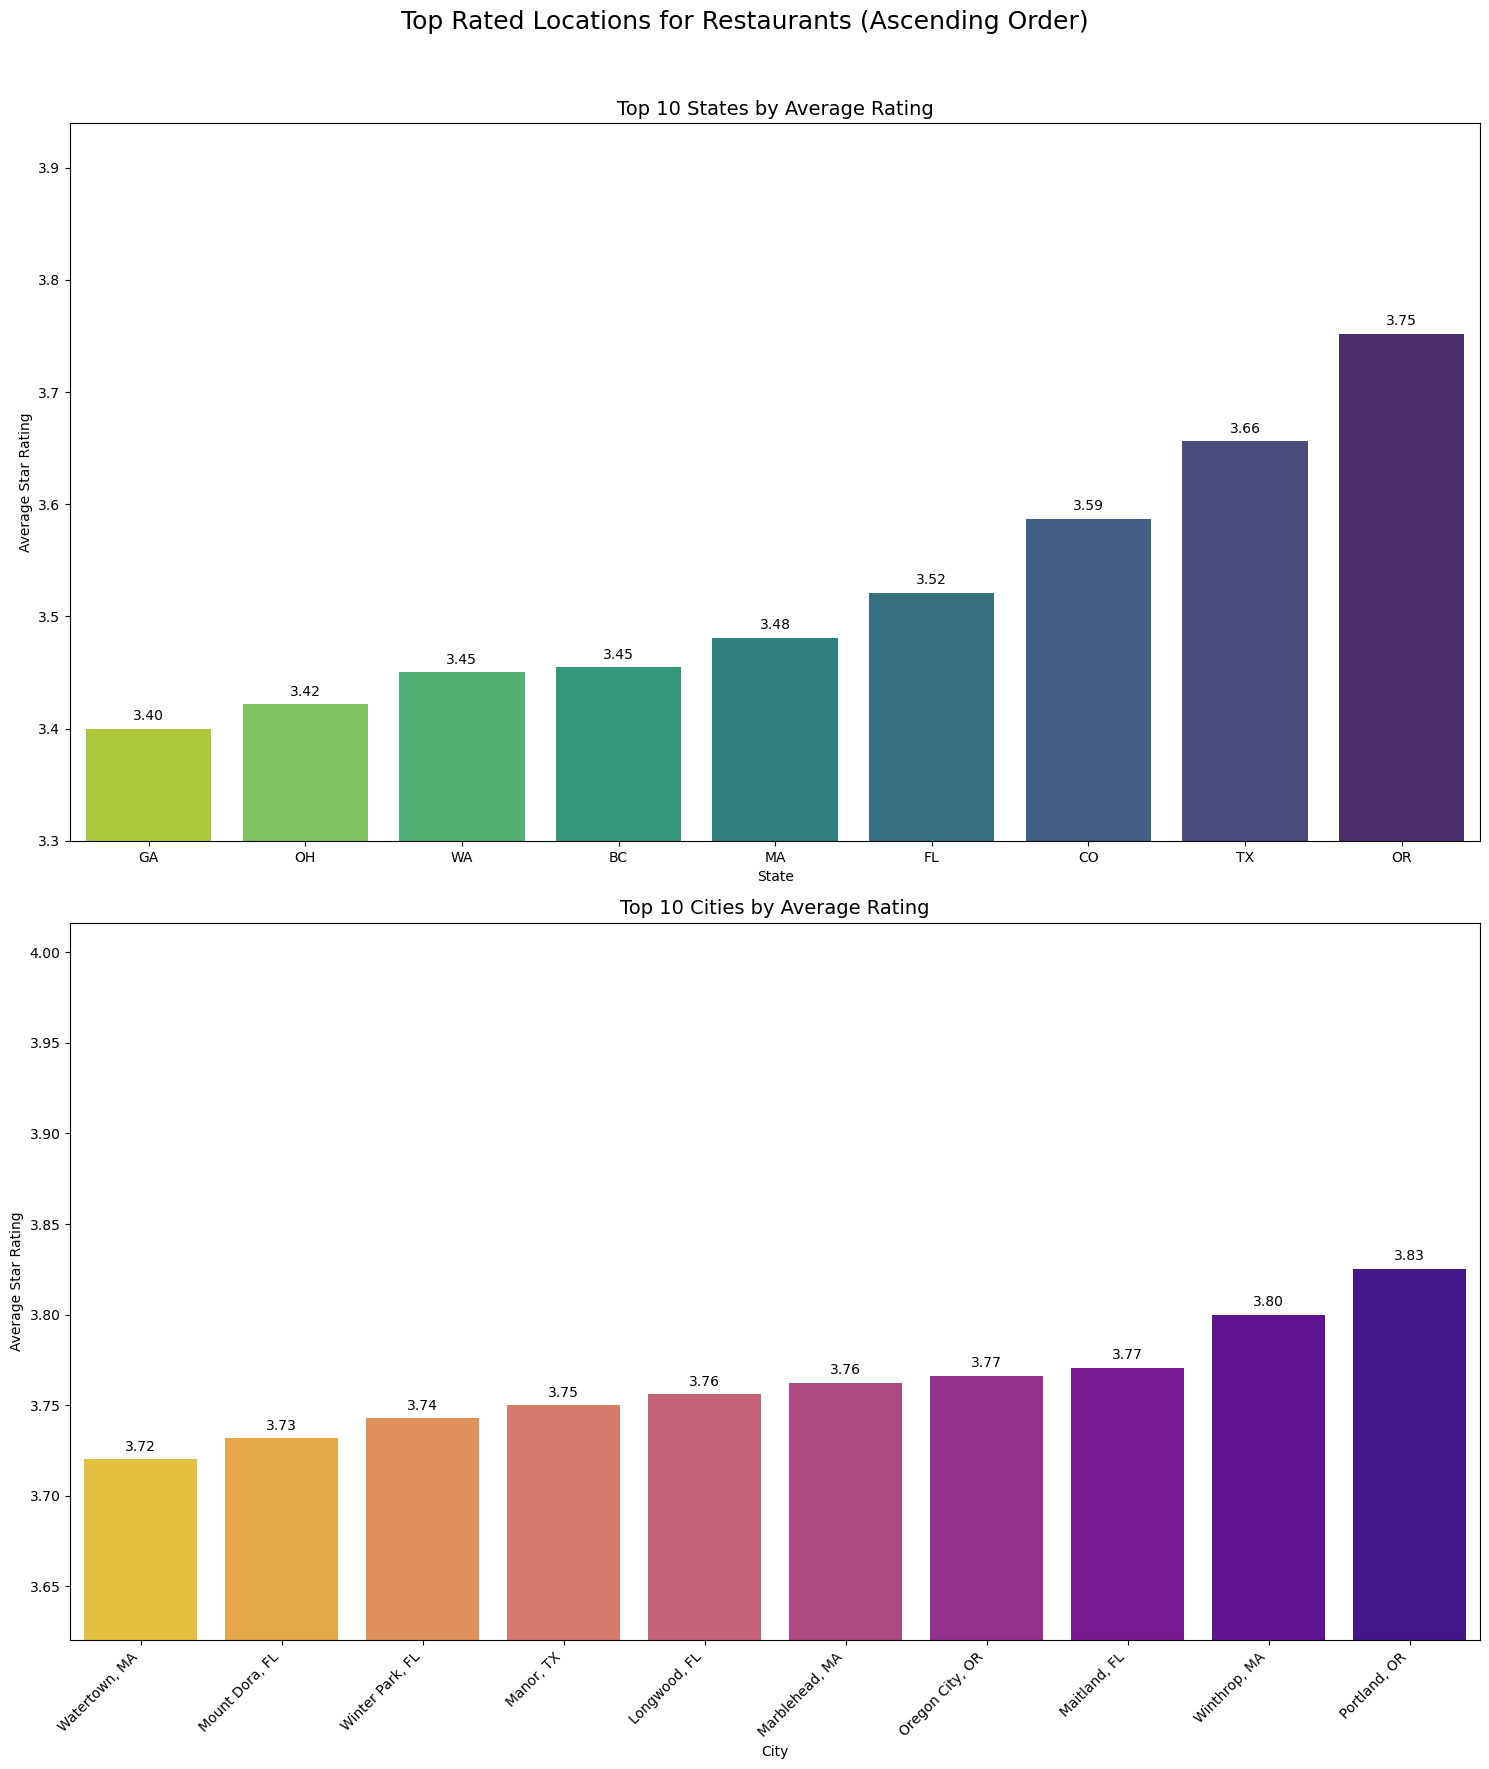

In [ ]:
# Here, it's important to set a minimum number of restaurants for these rankings.
# Otherwise, a single 5-star restaurant in a city would unfairly place it at the top.
# We've set a minimum of 50 restaurants for states and 30 for cities to ensure the averages are meaningful.

# --- State-Level Analysis ---

# SQL query to get the top 10 states by average rating
# Minimum of 50 restaurants to ensure the average is meaningful.
top_states_df = con.sql("""
    SELECT
        state,
        AVG(stars) AS avg_rating,
        SUM(review_count) AS total_reviews
    FROM
        restos
    GROUP BY
        state
    HAVING
        COUNT(int_business_id) > 50
    ORDER BY
        avg_rating DESC
    LIMIT 10;
""").df()

print("--- Top 10 States by Average Restaurant Rating (min. 50 restaurants) ---")
display(top_states_df)


# --- City-Level Analysis ---

# SQL query to get the top 10 cities by average rating
# We set a minimum of 30 restaurants here.
top_cities_df = con.sql("""
    SELECT
        city,
        state,
        AVG(stars) AS avg_rating,
        SUM(review_count) AS total_reviews
    FROM
        restos
    GROUP BY
        city, state
    HAVING
        COUNT(int_business_id) > 30
    ORDER BY
        avg_rating DESC
    LIMIT 10;
""").df()

print("\n--- Top 10 Cities by Average Restaurant Rating (min. 30 restaurants) ---")
# For better display, we'll combine city and state for the table
top_cities_df['location'] = top_cities_df['city'] + ", " + top_cities_df['state']
display(top_cities_df[['location', 'avg_rating', 'total_reviews']])

# --- Data Aggregation (same as before) ---
top_states_df = con.sql("""
    SELECT state, AVG(stars) AS avg_rating FROM restos
    GROUP BY state HAVING COUNT(int_business_id) > 50
    ORDER BY avg_rating DESC LIMIT 10;
""").df()
top_cities_df = con.sql("""
    SELECT city, state, AVG(stars) AS avg_rating FROM restos
    GROUP BY city, state HAVING COUNT(int_business_id) > 30
    ORDER BY avg_rating DESC LIMIT 10;
""").df()
top_cities_df['location'] = top_cities_df['city'] + ", " + top_cities_df['state']

# --- Sort data in ascending order for plotting ---
top_states_sorted = top_states_df.sort_values('avg_rating', ascending=True)
top_cities_sorted = top_cities_df.sort_values('avg_rating', ascending=True)

# --- Visualization with Fixes ---
fig, axes = plt.subplots(2, 1, figsize=(15, 18))
fig.suptitle('Top Rated Locations for Restaurants (Ascending Order)', fontsize=18)

# --- Plot for Top 10 States ---

ax1 = sns.barplot(ax=axes[0], data=top_states_sorted, x='state', y='avg_rating',
                  palette='viridis_r', hue='state', legend=False)
ax1.set_title('Top 10 States by Average Rating', fontsize=14)
ax1.set_xlabel('State')
ax1.set_ylabel('Average Star Rating')

if not top_states_sorted.empty:
    min_rating = top_states_sorted['avg_rating'].min()
    ax1.set_ylim(bottom=min_rating - 0.1)

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# --- Plot for Top 10 Cities ---

ax2 = sns.barplot(ax=axes[1], data=top_cities_sorted, x='location', y='avg_rating',
                  palette='plasma_r', hue='location', legend=False)
ax2.set_title('Top 10 Cities by Average Rating', fontsize=14)
ax2.set_xlabel('City')
ax2.set_ylabel('Average Star Rating')


ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

if not top_cities_sorted.empty:
    min_rating = top_cities_sorted['avg_rating'].min()
    ax2.set_ylim(bottom=min_rating - 0.1)

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 4. Do restaurants that offer delivery or reservations receive better ratings?

In [ ]:
delivery_reservation_ratings_df = con.sql("""
    SELECT
        "attributes.RestaurantsDelivery" AS has_delivery,
        "attributes.RestaurantsReservations" AS has_reservations,
        ROUND(AVG(stars), 2) AS avg_rating,
        COUNT(int_business_id) AS num_restaurants
    FROM
        restos
    WHERE
        "attributes.RestaurantsDelivery" IS NOT NULL
        AND "attributes.RestaurantsReservations" IS NOT NULL
        AND "attributes.RestaurantsDelivery" <> 'None'
        AND "attributes.RestaurantsReservations" <> 'None'
    GROUP BY
        has_delivery,
        has_reservations
    ORDER BY
        has_delivery,
        has_reservations;
""").df()

print("Average ratings based on Delivery and Reservation availability:")
display(delivery_reservation_ratings_df)

Average ratings based on Delivery and Reservation availability:


,has_delivery,has_reservations,avg_rating,num_restaurants
0,False,False,3.60,11289
1,False,True,3.53,6508
2,True,False,3.35,14419
3,True,True,3.61,6706


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# --- Data Preparation (same as before) ---
df_reg = df_r.copy()
delivery_col = 'attributes.RestaurantsDelivery'
reservations_col = 'attributes.RestaurantsReservations'
stars_col = 'stars'

valid_values = ['True', 'False']
df_reg_clean = df_reg[
    df_reg[delivery_col].isin(valid_values) &
    df_reg[reservations_col].isin(valid_values)
].copy()

# --- Model 1: Rating vs. Delivery ---
print("="*60)
print("### Model 1: How Delivery Availability Affects Restaurant Rating ###")
print("="*60)

# **FIX:** Wrap the column name in Q() to handle the '.' character
model1 = smf.ols(f"{stars_col} ~ C(Q('{delivery_col}'))", data=df_reg_clean).fit()
print(model1.summary())

r_squared1 = model1.rsquared
print(f"\n**R-squared Interpretation:**")
print(f"The R-squared is {r_squared1:.4f}. This means **{r_squared1:.2%}** of the variability in star ratings is explained by delivery availability.")

# --- Model 2: Rating vs. Reservations ---
print("\n" + "="*60)
print("### Model 2: How Reservation Availability Affects Restaurant Rating ###")
print("="*60)

# **FIX:** Wrap the column name in Q()
model2 = smf.ols(f"{stars_col} ~ C(Q('{reservations_col}'))", data=df_reg_clean).fit()
print(model2.summary())

r_squared2 = model2.rsquared
print(f"\n**R-squared Interpretation:**")
print(f"The R-squared is {r_squared2:.4f}. This means **{r_squared2:.2%}** of the variability in star ratings is explained by reservation availability.")

# --- Model 3: Rating vs. Delivery AND Reservations ---
print("\n" + "="*60)
print("### Model 3: How Both Features Together Affect Restaurant Rating ###")
print("="*60)

# **FIX:** Wrap both column names in Q()
model3 = smf.ols(f"{stars_col} ~ C(Q('{delivery_col}')) + C(Q('{reservations_col}'))", data=df_reg_clean).fit()
print(model3.summary())

r_squared3 = model3.rsquared
print(f"\n**R-squared Interpretation:**")
print(f"The R-squared is {r_squared3:.4f}. Together, both features explain **{r_squared3:.2%}** of the variability in star ratings.")

### Model 1: How Delivery Availability Affects Restaurant Rating ###
                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     356.6
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           3.44e-79
Time:                        04:14:17   Log-Likelihood:                -43752.
No. Observations:               38922   AIC:                         8.751e+04
Df Residuals:                   38920   BIC:                         8.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

**Additional Analysis:** Identifying the top 5 attribues which explain the variability in the data using simple regression models

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

# Create a list of all 'attributes' columns to test
attribute_cols = [col for col in df_r.columns if col.startswith('attributes.')]
r_squared_results = {}

print("Analyzing attributes... (This may take a moment)")

# Loop through each attribute column to build a model and get its R-squared value
for attr in attribute_cols:
    try:
        # Prepare data: Drop rows where the attribute is missing or 'None'
        df_model = df_r[['stars', attr]].dropna()
        if 'None' in df_model[attr].unique():
            df_model = df_model[df_model[attr] != 'None']

        # Ensure there's enough data to model
        if len(df_model[attr].unique()) < 2 or len(df_model) < 30:
            continue

        # Build and fit the simple regression model using the Q() wrapper
        # The C() function automatically handles categorical data (dummy variables)
        formula = f"stars ~ C(Q('{attr}'))"
        model = smf.ols(formula, data=df_model).fit()

        # Store the R-squared value
        r_squared_results[attr] = model.rsquared

    except Exception as e:
        # Ignore attributes that cause errors (e.g., due to data issues)
        # print(f"Could not process {attr}: {e}") # Optional: for debugging
        pass

# --- Display Results ---
# Convert the results to a DataFrame for sorting and display
results_df = pd.DataFrame(
    list(r_squared_results.items()),
    columns=['Attribute', 'R_Squared']
).sort_values('R_Squared', ascending=False)

# Clean up attribute names for readability
results_df['Attribute'] = results_df['Attribute'].str.replace('attributes.', '').str.replace('Restaurants', '')

print("\n--- Top Attributes Explaining Star Rating Variability ---")
display(results_df.head(5))

Analyzing attributes... (This may take a moment)

--- Top Attributes Explaining Star Rating Variability ---


,Attribute,R_Squared
28,DriveThru,0.288103
31,DietaryRestrictions,0.167510
12,Ambience,0.114257
3,BusinessParking,0.060367
15,GoodForMeal,0.055033


### 5. Are longer reviews associated with more useful/funny/cool votes?

Correlation Matrix:


,review_length,useful,funny,cool
review_length,1.000000,0.274977,0.199694,0.174745
useful,0.274977,1.000000,0.716864,0.817998
funny,0.199694,0.716864,1.000000,0.706421
cool,0.174745,0.817998,0.706421,1.000000


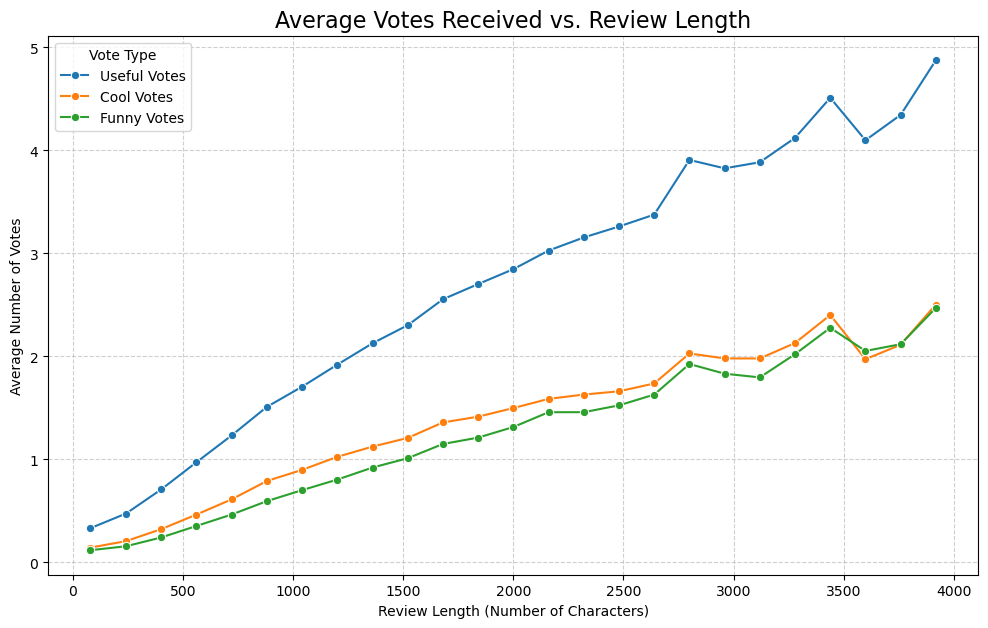

In [ ]:
# Calculate review length
df_rr['review_length'] = df_rr['text'].str.len()

# Calculate correlation between length and votes
vote_correlations = df_rr[['review_length', 'useful', 'funny', 'cool']].corr()

print("Correlation Matrix:")
display(vote_correlations)
# --- Create a cleaner visualization by binning the data ---

# 1. Create bins for review length to group similar-length reviews
df_vis = df_rr[df_rr['review_length'] <= 4000].copy()
df_vis['length_bin'] = pd.cut(df_vis['review_length'], bins=25)

# 2. Calculate the average votes for each length bin
# **FIX**: Added observed=False to the groupby call to silence the warning
agg_data = df_vis.groupby('length_bin', observed=False)[['useful', 'funny', 'cool']].mean().reset_index()

# 3. Get the midpoint of each bin for a cleaner x-axis
agg_data['length_midpoint'] = agg_data['length_bin'].apply(lambda x: x.mid)

# 4. Create the line plot
plt.figure(figsize=(12, 7))
sns.lineplot(data=agg_data, x='length_midpoint', y='useful', label='Useful Votes', marker='.', markersize=12)
sns.lineplot(data=agg_data, x='length_midpoint', y='cool', label='Cool Votes', marker='.', markersize=12)
sns.lineplot(data=agg_data, x='length_midpoint', y='funny', label='Funny Votes', marker='.', markersize=12)

plt.title('Average Votes Received vs. Review Length', fontsize=16)
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Average Number of Votes')
plt.legend(title='Vote Type')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

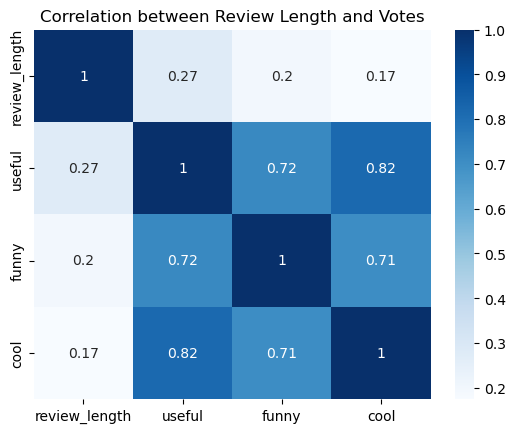

In [ ]:
sns.heatmap(vote_correlations, annot=True, cmap='Blues')
plt.title("Correlation between Review Length and Votes")
plt.show()

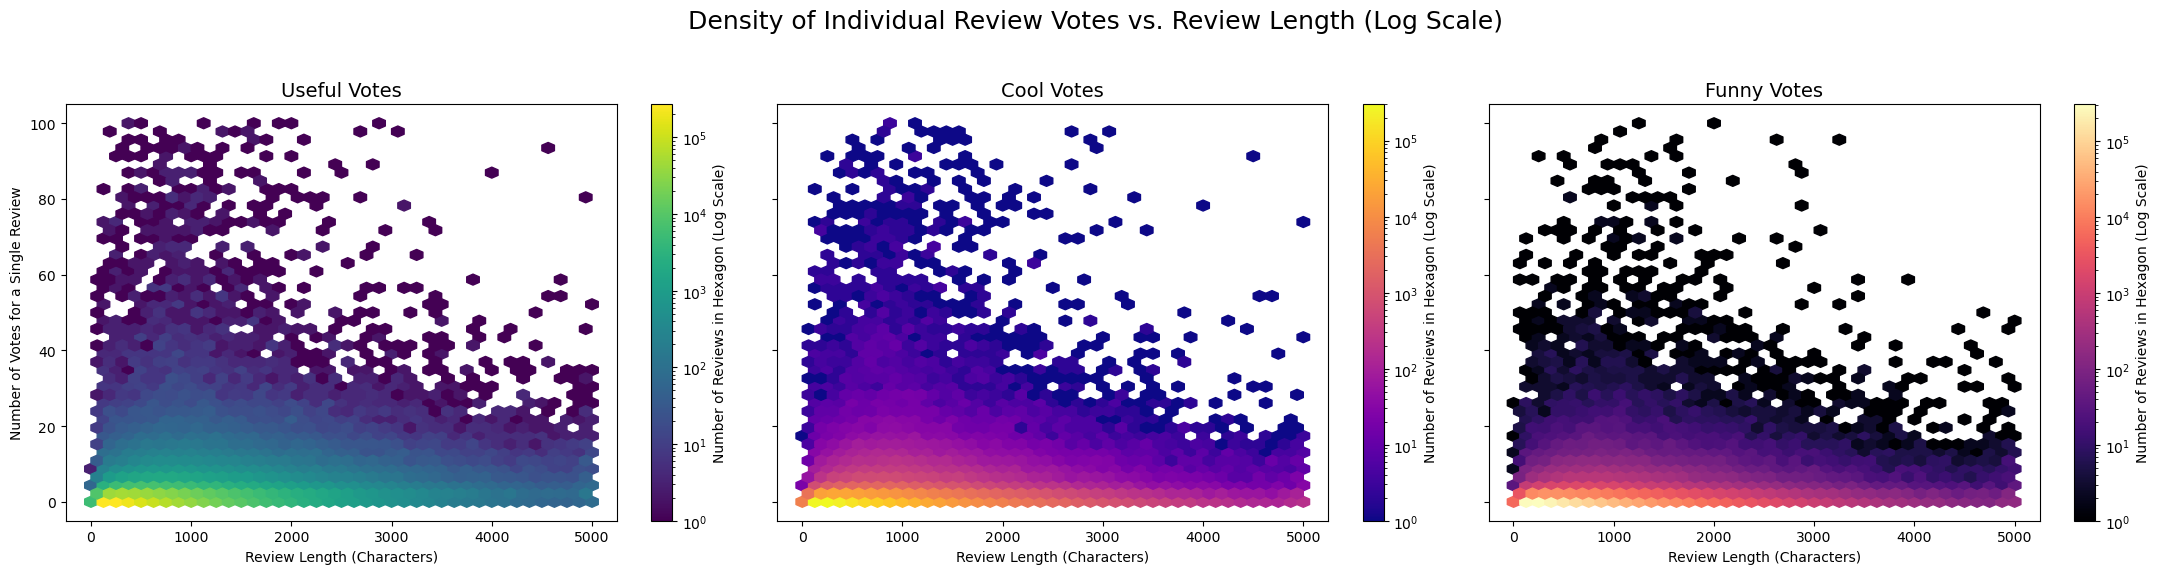

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Prepare the data, focusing on a reasonable range to make the plot readable
df_hex = df_rr[df_rr['review_length'] <= 5000].copy()
df_hex_useful = df_hex[df_hex['useful'] <= 100]
df_hex_cool = df_hex[df_hex['cool'] <= 100]
df_hex_funny = df_hex[df_hex['funny'] <= 100]


# --- Create Improved Hexbin Plots ---
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=True)
fig.suptitle('Density of Individual Review Votes vs. Review Length (Log Scale)', fontsize=18)

# --- Plot 1: Useful Votes ---
# **IMPROVEMENT**: Added a logarithmic color scale (norm=mcolors.LogNorm())
hb1 = axes[0].hexbin(
    df_hex_useful['review_length'],
    df_hex_useful['useful'],
    gridsize=40,
    cmap='viridis',
    norm=mcolors.LogNorm(), # Use a log scale for better color contrast
    mincnt=1
)
axes[0].set_title('Useful Votes', fontsize=14)
axes[0].set_xlabel('Review Length (Characters)')
axes[0].set_ylabel('Number of Votes for a Single Review')
# **LEGEND**: Add the colorbar
fig.colorbar(hb1, ax=axes[0], label='Number of Reviews in Hexagon (Log Scale)')


# --- Plot 2: Cool Votes ---
hb2 = axes[1].hexbin(
    df_hex_cool['review_length'],
    df_hex_cool['cool'],
    gridsize=40,
    cmap='plasma',
    norm=mcolors.LogNorm(),
    mincnt=1
)
axes[1].set_title('Cool Votes', fontsize=14)
axes[1].set_xlabel('Review Length (Characters)')
fig.colorbar(hb2, ax=axes[1], label='Number of Reviews in Hexagon (Log Scale)')


# --- Plot 3: Funny Votes ---
hb3 = axes[2].hexbin(
    df_hex_funny['review_length'],
    df_hex_funny['funny'],
    gridsize=40,
    cmap='magma',
    norm=mcolors.LogNorm(),
    mincnt=1
)
axes[2].set_title('Funny Votes', fontsize=14)
axes[2].set_xlabel('Review Length (Characters)')
fig.colorbar(hb3, ax=axes[2], label='Number of Reviews in Hexagon (Log Scale)')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 6.Are reviews by users with more friends more likely to get votes?

In [ ]:
friend_influence_df = con.sql("""
    SELECT
        CASE
            WHEN F.num_friends = 0 THEN '0 Friends'
            WHEN F.num_friends BETWEEN 1 AND 25 THEN '1-25 Friends'
            WHEN F.num_friends BETWEEN 26 AND 100 THEN '26-100 Friends'
            WHEN F.num_friends BETWEEN 101 AND 500 THEN '101-500 Friends'
            ELSE '500+ Friends'
        END AS friend_bucket,
        AVG(R.useful) AS avg_useful,
        AVG(R.funny) AS avg_funny,
        AVG(R.cool) AS avg_cool,
        COUNT(R.int_rest_review_id) AS num_reviews
    FROM
        resto_reviews AS R
    INNER JOIN
        user_friends AS F ON R.int_user_id = F.int_user_id
    GROUP BY
        friend_bucket
    ORDER BY
        MIN(F.num_friends); -- Order buckets logically
""").df()

print("Average votes received on reviews, based on the author's number of friends:")
display(friend_influence_df)

Average votes received on reviews, based on the author's number of friends:


,friend_bucket,avg_useful,avg_funny,avg_cool,num_reviews
0,0 Friends,0.458477,0.135303,0.115129,394255
1,1-25 Friends,0.711826,0.236567,0.249031,483076
2,26-100 Friends,0.876509,0.305960,0.375055,331442
3,101-500 Friends,1.306435,0.530642,0.711235,385126
4,500+ Friends,4.149245,2.134182,3.101039,80197


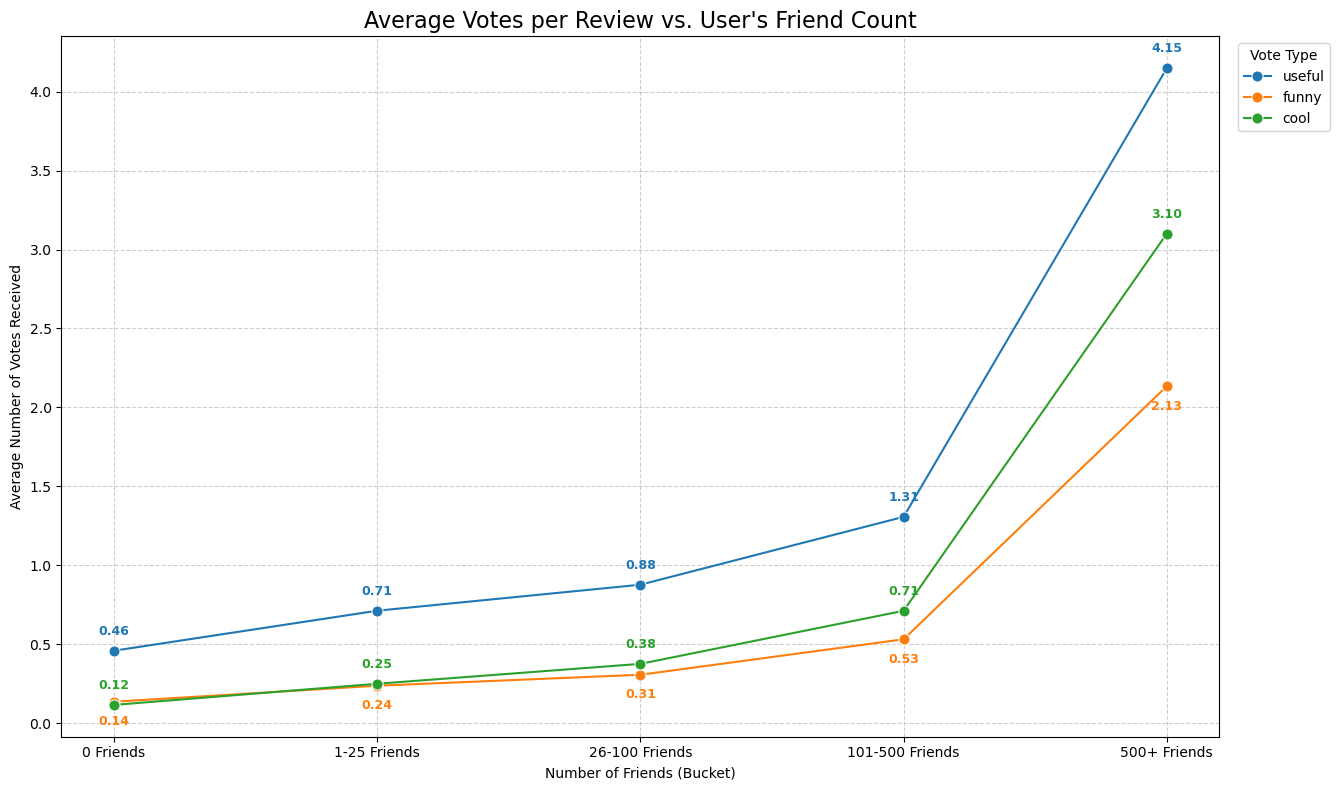

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Aggregation (SQL query from the original question) ---
friend_influence_df = con.sql("""
    SELECT
        CASE
            WHEN F.num_friends = 0 THEN '0 Friends'
            WHEN F.num_friends BETWEEN 1 AND 25 THEN '1-25 Friends'
            WHEN F.num_friends BETWEEN 26 AND 100 THEN '26-100 Friends'
            WHEN F.num_friends BETWEEN 101 AND 500 THEN '101-500 Friends'
            ELSE '500+ Friends'
        END AS friend_bucket,
        AVG(R.useful) AS useful,
        AVG(R.funny) AS funny,
        AVG(R.cool) AS cool
    FROM
        resto_reviews AS R
    INNER JOIN
        user_friends AS F ON R.int_user_id = F.int_user_id
    GROUP BY
        friend_bucket
    ORDER BY
        MIN(F.num_friends);
""").df()

# --- Visualization ---

# 1. Reshape the data for plotting
df_melted = pd.melt(friend_influence_df,
                    id_vars=['friend_bucket'],
                    value_vars=['useful', 'funny', 'cool'],
                    var_name='vote_type',
                    value_name='average_votes')

# 2. Create the line plot
plt.figure(figsize=(15, 8))
ax = sns.lineplot(data=df_melted,
                  x='friend_bucket',
                  y='average_votes',
                  hue='vote_type',
                  marker='o',
                  markersize=8)

# 3. **IMPROVEMENT**: Add data labels with specific colors and offsets

# First, create a map from the vote type to its assigned color
palette = sns.color_palette()
color_map = {vote_type: color for vote_type, color in zip(df_melted['vote_type'].unique(), palette)}

# Now, loop through the data to add the text labels
for index, row in df_melted.iterrows():
    # Define a different vertical offset for each line to prevent overlap
    if row['vote_type'] == 'useful':
        offset = 0.1
    elif row['vote_type'] == 'funny':
        offset = -0.15
    else: # 'cool'
        offset = 0.1

    ax.text(x=row['friend_bucket'],
            y=row['average_votes'] + offset,
            s=f"{row['average_votes']:.2f}",
            color=color_map[row['vote_type']], # Use the mapped color
            ha='center',
            fontweight='bold',
            fontsize=9)

# 4. Add titles and labels for clarity
plt.title('Average Votes per Review vs. User\'s Friend Count', fontsize=16)
plt.xlabel('Number of Friends (Bucket)')
plt.ylabel('Average Number of Votes Received')
plt.grid(True, linestyle='--', alpha=0.6)
# Adjust legend position for better layout
plt.legend(title='Vote Type', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust layout to make space for legend
plt.show()

Correlation between number of friends and review votes:


,num_friends,useful,funny,cool
num_friends,1.000000,0.369284,0.310088,0.357302
useful,0.369284,1.000000,0.716864,0.817998
funny,0.310088,0.716864,1.000000,0.706421
cool,0.357302,0.817998,0.706421,1.000000


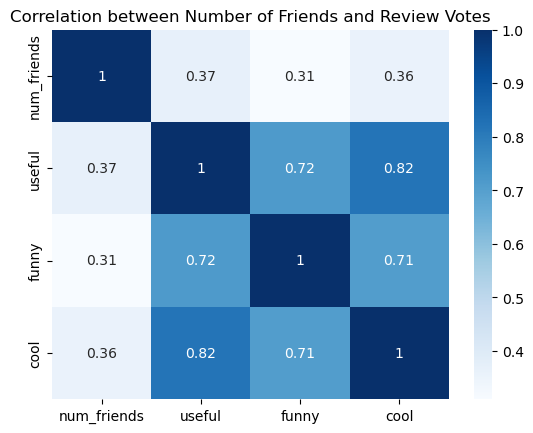

In [ ]:
# Merge the reviews and user_friends dataframes on int_user_id
df_reviews_users = pd.merge(df_rr, df_uf[['int_user_id', 'num_friends']], on='int_user_id', how='left')

# Calculate the correlation between num_friends and vote counts
friends_vote_correlations = df_reviews_users[['num_friends', 'useful', 'funny', 'cool']].corr()

print("Correlation between number of friends and review votes:")
display(friends_vote_correlations)

# Visualize the correlation as a heatmap
sns.heatmap(friends_vote_correlations, annot=True, cmap='Blues')
plt.title("Correlation between Number of Friends and Review Votes")
plt.show()

### 7. What are the busiest times?


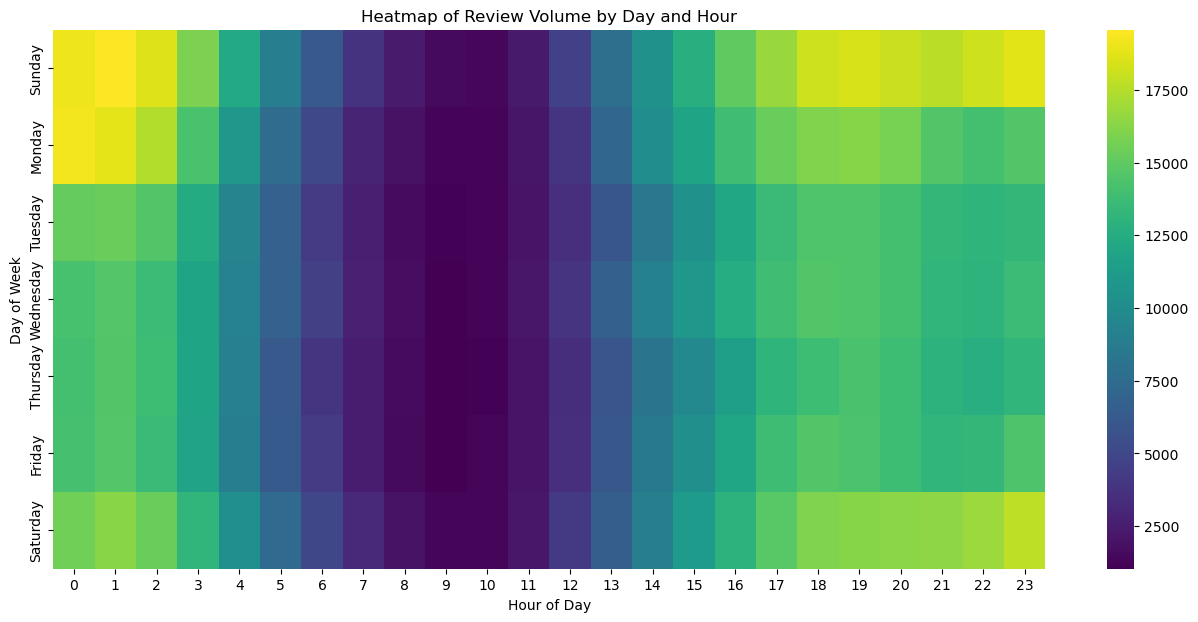

In [ ]:
# Convert 'date' column to datetime objects
df_rr['date'] = pd.to_datetime(df_rr['date'])

# Extract day of week and hour of day
df_rr['day_of_week'] = df_rr['date'].dt.day_name()
df_rr['hour_of_day'] = df_rr['date'].dt.hour

# Create a pivot table for the number of reviews
review_counts_pivot = df_rr.pivot_table(
    index='day_of_week',
    columns='hour_of_day',
    values='int_rest_review_id',
    aggfunc='count'
)

# Order the days of the week correctly
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
review_counts_pivot = review_counts_pivot.reindex(days_order)

# Create the heatmap
plt.figure(figsize=(16, 7))
sns.heatmap(review_counts_pivot, cmap="viridis", annot=False)
plt.title('Heatmap of Review Volume by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

### 8.What features are common among the most popular & liked restaurants?

### Analysis for: DriveThru


DriveThru,No,Yes
group_type,,
Elite,86.9%,13.1%
Regular,48.6%,51.4%


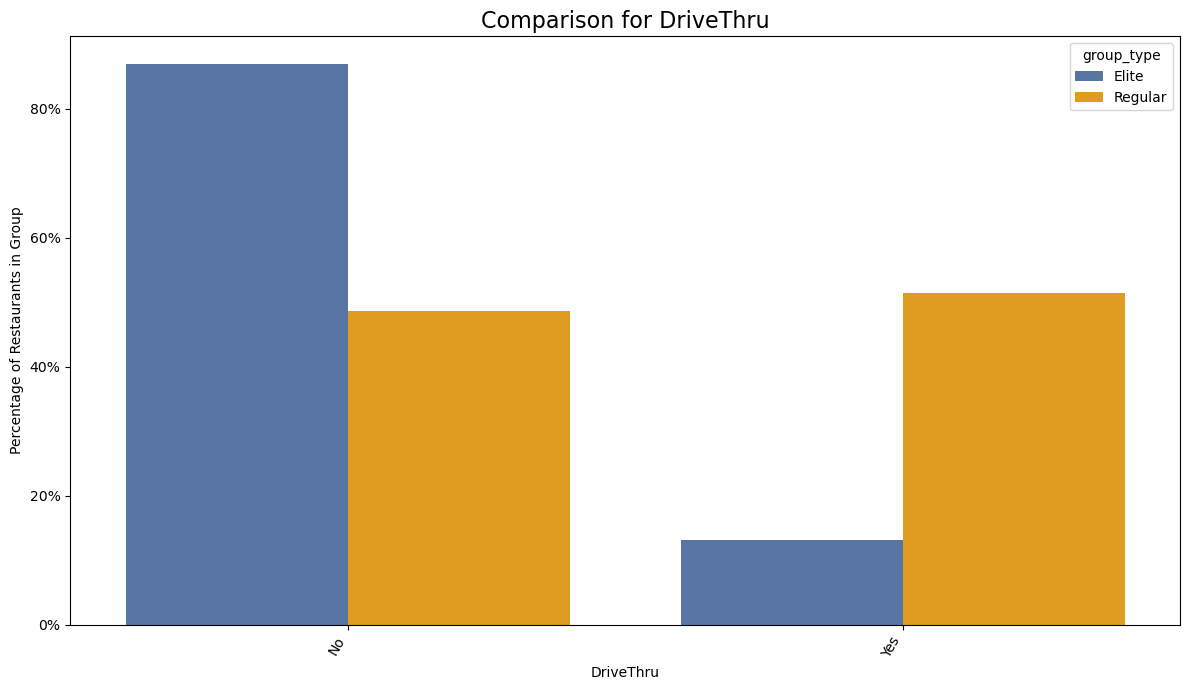




### Analysis for: DietaryRestrictions


DietaryRestrictions,Dairy Free + Gluten Free,Dairy Free + Gluten Free + Vegan + Vegetarian,Gluten Free,Gluten Free + Vegan,Gluten Free + Vegan + Vegetarian,Vegan,Vegan + Vegetarian,Vegetarian
group_type,,,,,,,,
Elite,0.0%,0.0%,33.3%,0.0%,0.0%,16.7%,33.3%,16.7%
Regular,1.7%,1.7%,44.8%,12.1%,5.2%,12.1%,6.9%,15.5%


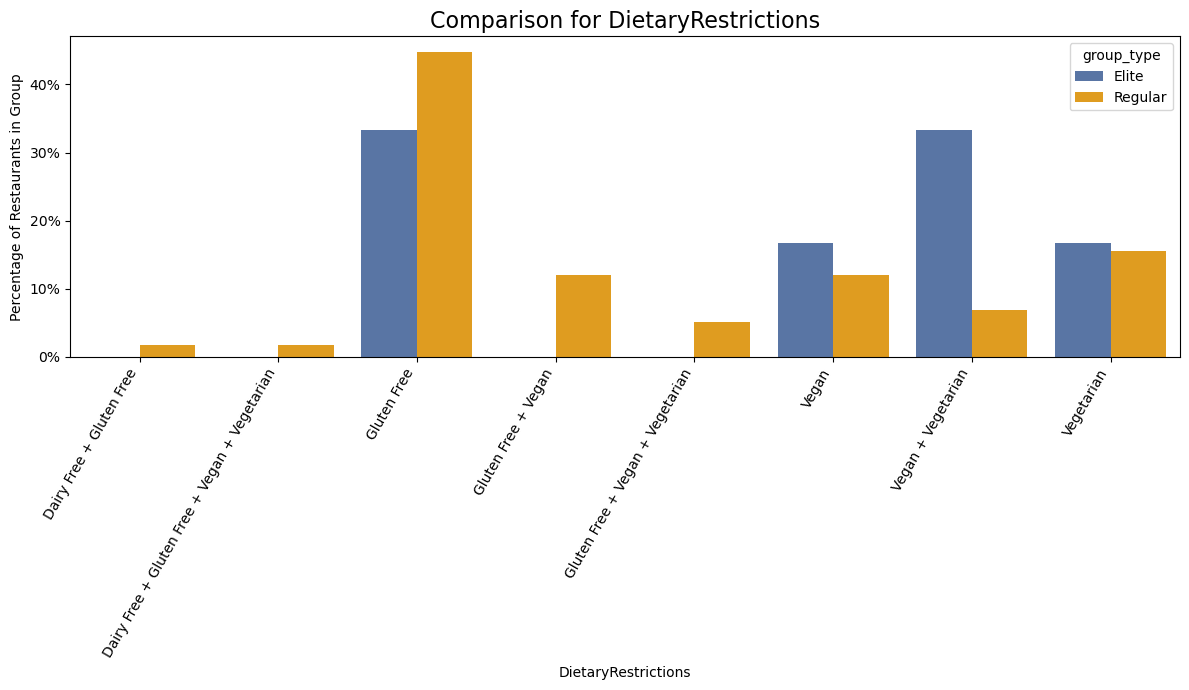




### Analysis for: Ambience
(Showing Top 10 most frequent categories for readability)


Ambience,Casual,Casual + Classy,Casual + Classy + Trendy,Casual + Divey,Casual + Hipster,Casual + Trendy,Classy,Classy + Trendy,Divey,Trendy
group_type,,,,,,,,,,
Elite,57.1%,18.0%,3.3%,1.3%,3.2%,5.4%,7.9%,2.7%,0.5%,0.6%
Regular,69.4%,9.8%,1.2%,1.1%,1.2%,2.3%,8.8%,1.7%,2.4%,2.1%


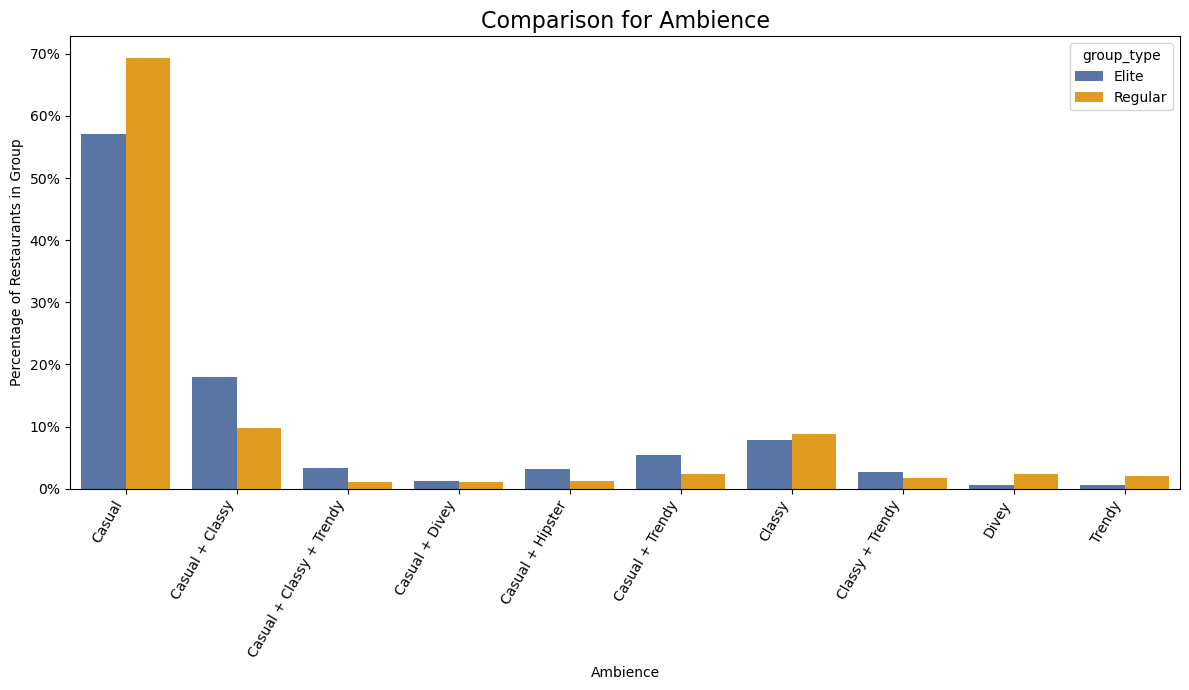




### Analysis for: BusinessParking
(Showing Top 10 most frequent categories for readability)


BusinessParking,Garage,Garage + Lot,Garage + Lot + Street,Garage + Street,Lot,Lot + Street,Lot + Valet,Street,Street + Valet,Valet
group_type,,,,,,,,,,
Elite,1.3%,1.0%,1.1%,3.1%,37.2%,16.8%,1.2%,37.0%,1.0%,0.5%
Regular,2.5%,0.7%,0.7%,2.7%,47.6%,9.6%,0.7%,33.7%,0.8%,1.1%


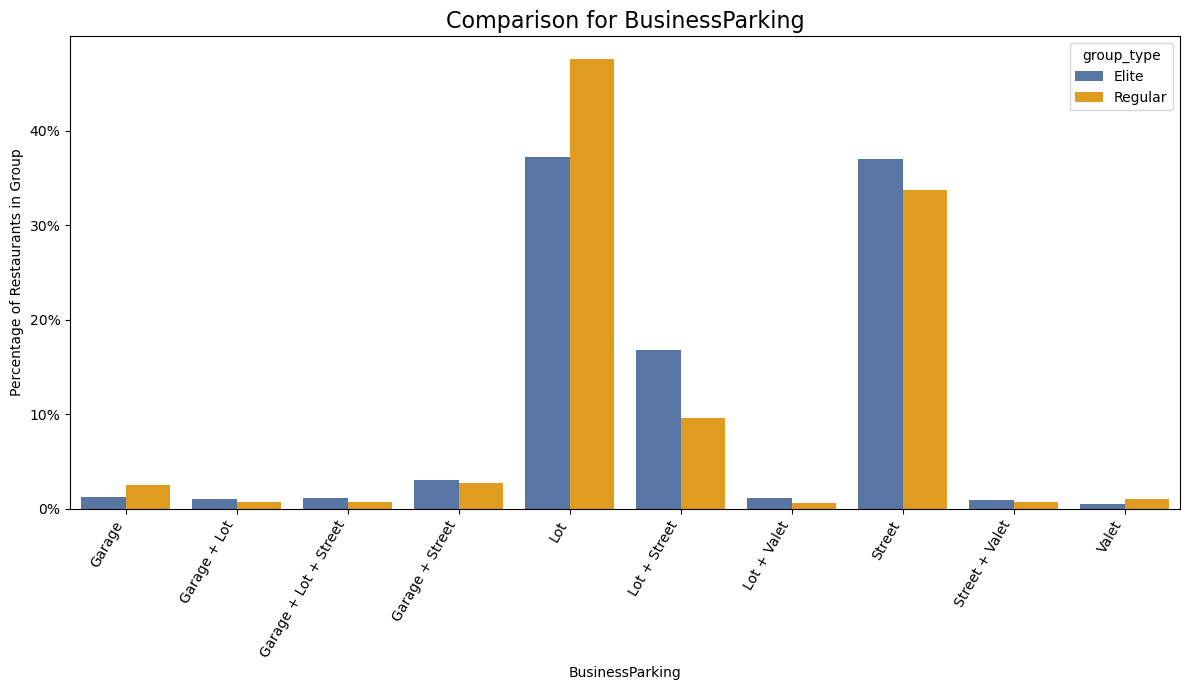




### Analysis for: RestaurantsPriceRange2


RestaurantsPriceRange2,1,2,3,4
group_type,,,,
Elite,35.9%,57.6%,5.1%,1.3%
Regular,46.1%,49.5%,3.9%,0.5%


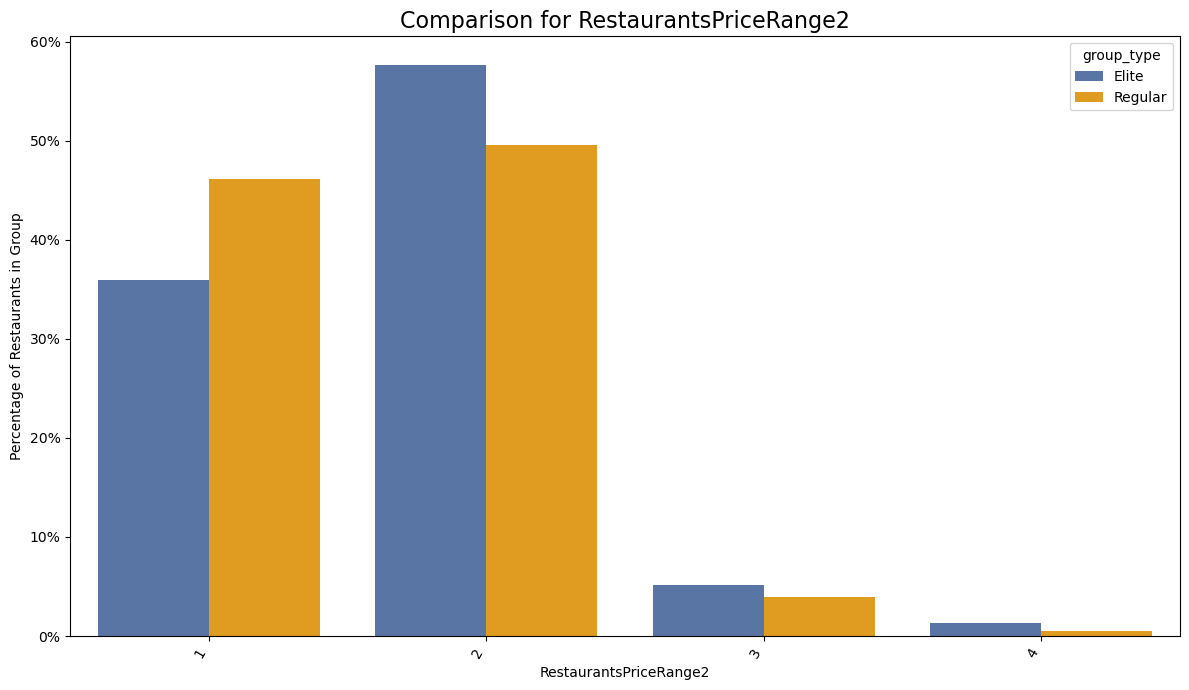




### Analysis for: GoodForMeal
(Showing Top 10 most frequent categories for readability)


GoodForMeal,Breakfast,Breakfast + Brunch,Breakfast + Brunch + Lunch,Breakfast + Lunch,Dessert + Dinner + Lunch,Dinner,Dinner + Latenight,Dinner + Latenight + Lunch,Dinner + Lunch,Lunch
group_type,,,,,,,,,,
Elite,1.7%,2.4%,8.8%,2.7%,4.7%,20.9%,1.9%,1.2%,41.8%,13.8%
Regular,3.1%,2.1%,3.9%,2.9%,2.4%,18.2%,2.4%,3.0%,43.6%,18.3%


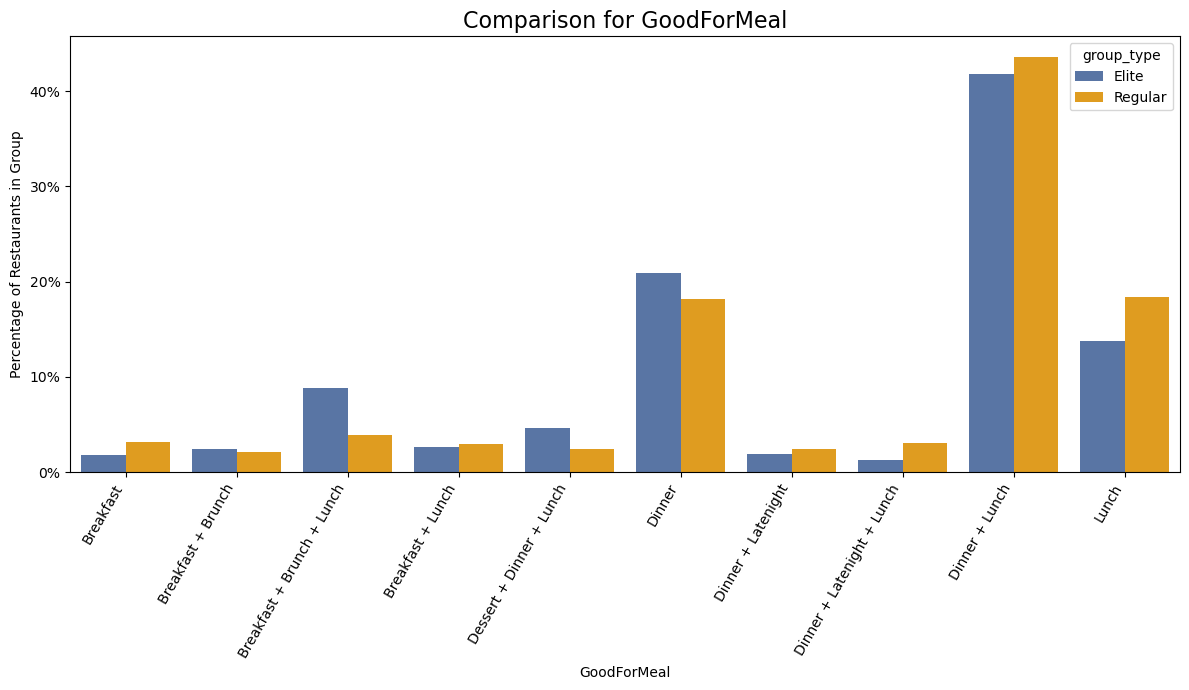




### Analysis for: OutdoorSeating


OutdoorSeating,No,Yes
group_type,,
Elite,35.0%,65.0%
Regular,51.6%,48.4%


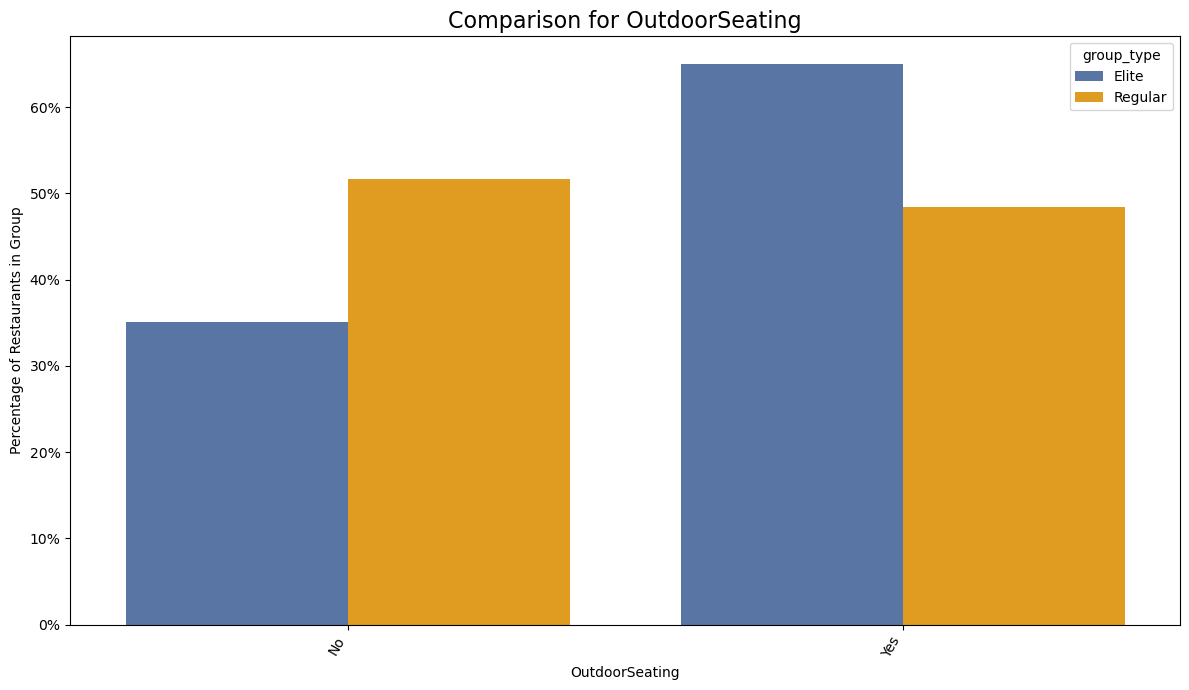




### Analysis for: WiFi


WiFi,free,no,paid
group_type,,,
Elite,57.7%,42.2%,0.1%
Regular,55.5%,43.8%,0.8%


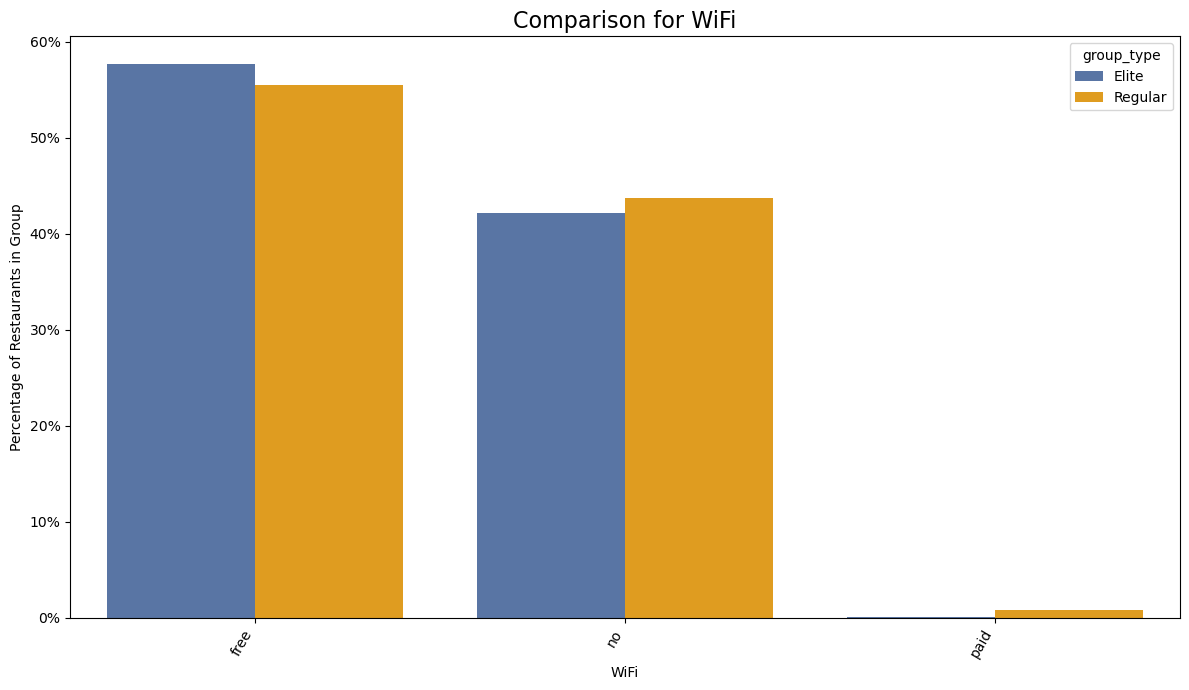

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Helper Function to create readable labels from dictionary-like strings
def generate_label_from_dict_string(dict_string):
    """Parses a dictionary string and creates a label from keys with a True value."""
    try:
        data_dict = ast.literal_eval(str(dict_string))
        if not isinstance(data_dict, dict):
            return "N/A"

        true_options = [key.replace('-', ' ').title() for key, value in data_dict.items() if value is True]

        if not true_options:
            return "None"

        return " + ".join(sorted(true_options)) # Sorted for consistent labels
    except (ValueError, SyntaxError):
        return "N/A"

# --- Main Analysis Code ---

# 1. Define the attributes to analyze
features_to_analyze = [
    'attributes.DriveThru',
    'attributes.DietaryRestrictions',
    'attributes.Ambience',
    'attributes.BusinessParking',
    'attributes.RestaurantsPriceRange2',
    'attributes.GoodForMeal',
    'attributes.OutdoorSeating',
    'attributes.WiFi'
]
# Define which attributes are complex strings that need parsing
complex_attrs_list = [
    'attributes.DietaryRestrictions',
    'attributes.Ambience',
    'attributes.BusinessParking',
    'attributes.GoodForMeal'
]
# Define which attributes should be filtered to their Top 10 values
attrs_to_filter_top_10 = [
    'attributes.Ambience',
    'attributes.BusinessParking',
    'attributes.GoodForMeal'
]

# 2. Label restaurants based on the specified criteria
df_labeled = df_r.copy()
df_labeled['group_type'] = 'Regular'
elite_condition = (df_labeled['stars'] >= 4.5) & (df_labeled['review_count'] > 100)
df_labeled.loc[elite_condition, 'group_type'] = 'Elite'

# 3. Loop to analyze and visualize each feature
for attr in features_to_analyze:
    clean_attr_name = attr.replace('attributes.', '')
    print("="*60)
    print(f"### Analysis for: {clean_attr_name}")
    print("="*60)

    # a. Isolate and clean the data for the current attribute
    df_analysis = df_labeled[['group_type', attr]].dropna(subset=[attr]).copy()
    analysis_col_name = clean_attr_name # This column will hold the transformed labels

    # b. Apply the correct transformation based on the attribute type
    # First, apply universal string cleaning for attributes like WiFi
    if df_analysis[attr].dtype == 'object':
        df_analysis[analysis_col_name] = df_analysis[attr].str.replace("u'", "").str.replace("'", "")
    else:
        df_analysis[analysis_col_name] = df_analysis[attr]

    # Now apply specific transformations
    if attr == 'attributes.DriveThru':
        # Combine 'False' and 'none' into a single 'No' category
        drive_thru_map = {'True': 'Yes', 'False': 'No', 'none': 'No'}
        df_analysis[analysis_col_name] = df_analysis[analysis_col_name].replace(drive_thru_map)

    elif attr in complex_attrs_list:
        # Use the helper function for complex dictionary strings
        df_analysis[analysis_col_name] = df_analysis[attr].apply(generate_label_from_dict_string)
        df_analysis = df_analysis[~df_analysis[analysis_col_name].isin(['N/A', 'None'])]

    else: # For simple attributes like PriceRange2, OutdoorSeating
        df_analysis[analysis_col_name] = df_analysis[analysis_col_name].replace({'True': 'Yes', 'False': 'No'})

    # Remove any remaining 'None' string values from simple attributes
    if attr not in complex_attrs_list:
        df_analysis = df_analysis[df_analysis[analysis_col_name] != 'None']

    # c. Conditionally filter to Top 10 for specified attributes
    if attr in attrs_to_filter_top_10:
        top_10_values = df_analysis[analysis_col_name].value_counts().nlargest(10).index
        df_analysis = df_analysis[df_analysis[analysis_col_name].isin(top_10_values)]
        print("(Showing Top 10 most frequent categories for readability)")

    # d. Create and display the comparison table
    comparison_table = pd.crosstab(df_analysis['group_type'], df_analysis[analysis_col_name], normalize='index')
    display(comparison_table.mul(100).round(1).astype(str) + '%')

    # e. Visualize the comparison
    df_plot = comparison_table.reset_index().melt(id_vars='group_type', var_name=analysis_col_name, value_name='Percentage')

    fig_width = max(12, len(comparison_table.columns) * 1.2) # Adjust width for many categories
    plt.figure(figsize=(fig_width, 7))

    sns.barplot(data=df_plot, x=analysis_col_name, y='Percentage', hue='group_type', palette=['#4C72B0', '#FFA500'])
    plt.title(f'Comparison for {clean_attr_name}', fontsize=16)
    plt.ylabel('Percentage of Restaurants in Group')
    plt.xlabel(clean_attr_name)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

    plt.xticks(rotation=60, ha='right')
    plt.tight_layout()
    plt.show()
    print("\n\n")

### 9. How has the average review rating changed over time by state?

Plotting trends for 16 states...


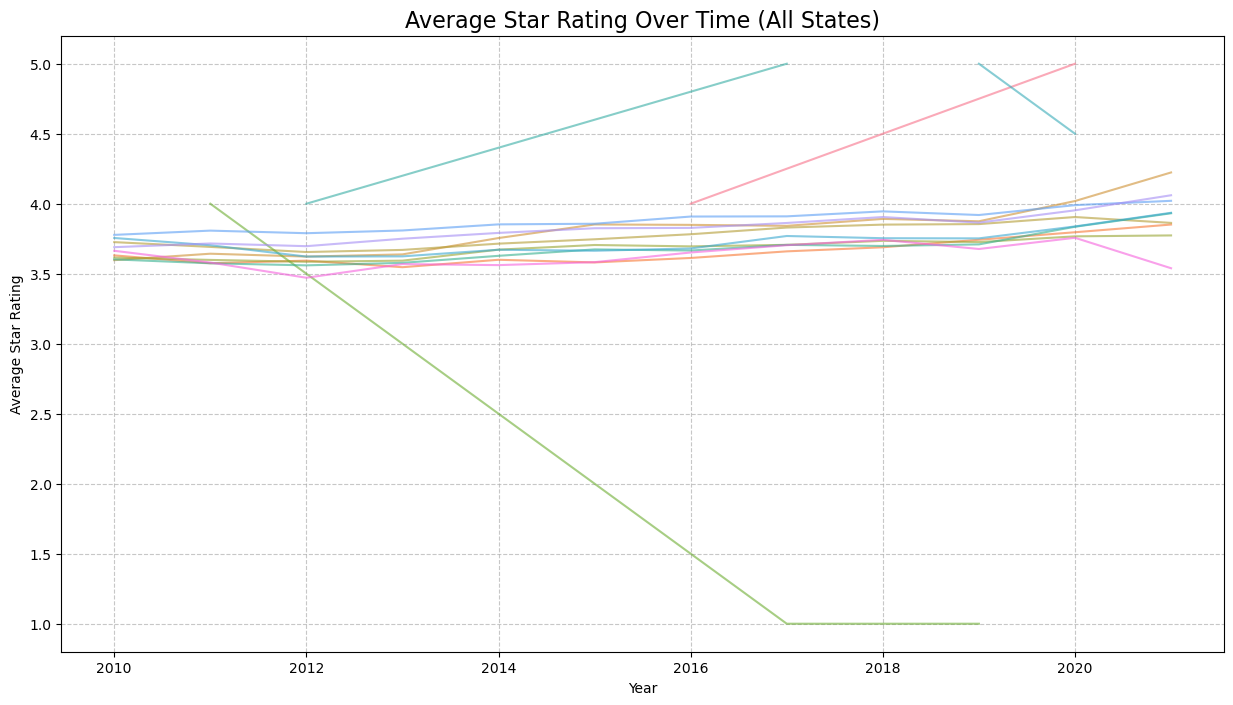

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Combine the review and restaurant dataframes
df_merged = pd.merge(df_rr, df_r[['int_business_id', 'state']], on='int_business_id', how='inner')

# 2. Convert date column to datetime objects and extract the year
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['year'] = df_merged['date'].dt.year

# Filter for a reasonable time period
df_merged = df_merged[df_merged['year'].between(2010, 2022)]

# 3. **MODIFICATION**: The "top 5" filter is removed. We will now aggregate for ALL states.
time_series_agg = df_merged.groupby(['state', 'year'])['stars'].mean().reset_index()

# 4. Create the line plot for all states
plt.figure(figsize=(15, 8))
print(f"Plotting trends for {time_series_agg['state'].nunique()} states...")

sns.lineplot(
    data=time_series_agg,
    x='year',
    y='stars',
    hue='state',    # 'hue' draws a separate line for each state
    legend=False,   # The legend is disabled to avoid clutter
    alpha=0.6,      # Use transparency to see overlapping lines
    linewidth=1.5
)

# 5. Add titles and labels for clarity
plt.title('Average Star Rating Over Time (All States)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Star Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

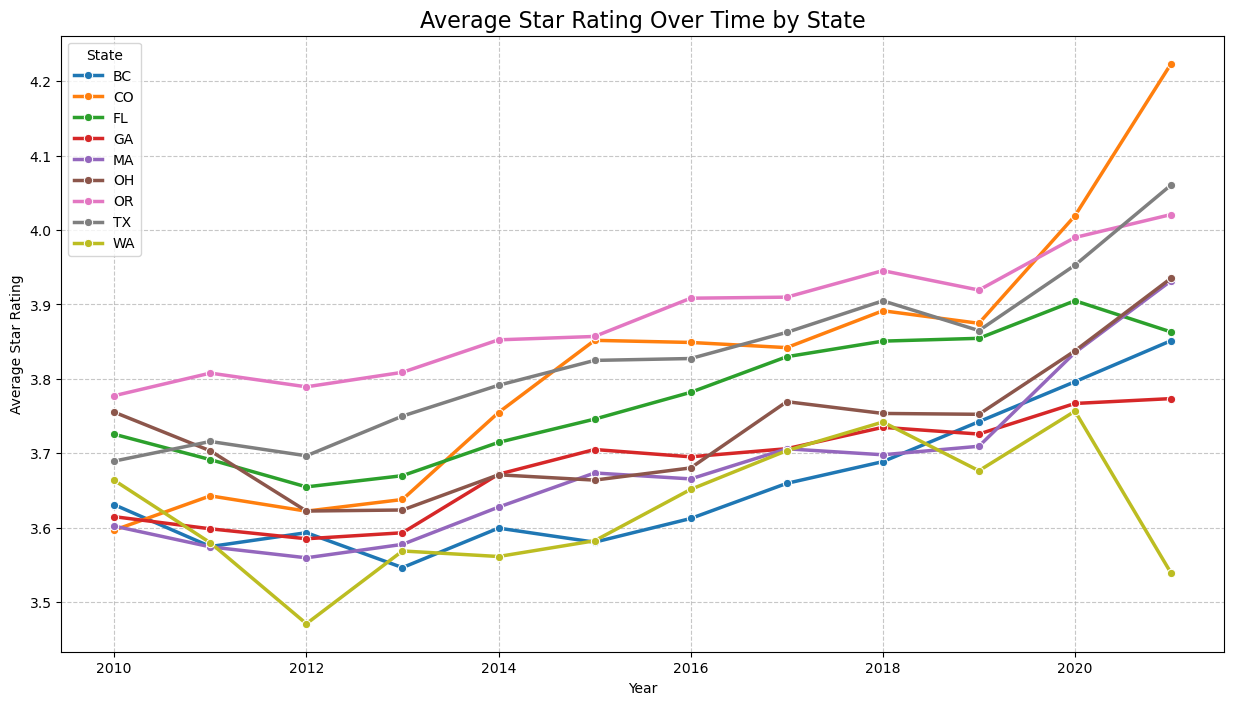

In [ ]:
# From the above plot that for most of the states, the rating is distributed
# mostly around the middle of the chart. On counting, we can see that there
# are 9 states in that clusture. For a cleaner view we are plotting those
# 9 states separately here.

# 1. Combine the review and restaurant dataframes
df_merged = pd.merge(df_rr, df_r[['int_business_id', 'state']], on='int_business_id', how='inner')

# 2. Convert date column to datetime objects and extract the year
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['year'] = df_merged['date'].dt.year

# Filter for a reasonable time period to ensure data is not too sparse
df_merged = df_merged[df_merged['year'].between(2010, 2022)]

# 3. Find the top 9 states by review count for a clean visualization
top_9_states = df_merged['state'].value_counts().nlargest(9).index
df_plot_data = df_merged[df_merged['state'].isin(top_9_states)]

# 4. Aggregate data: Group by state and year and calculate the mean star rating
time_series_agg = df_plot_data.groupby(['state', 'year'])['stars'].mean().reset_index()

# 5. Create the line plot
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=time_series_agg,
    x='year',
    y='stars',
    hue='state',  # This creates the different colored lines and the legend
    marker='o',
    linewidth=2.5
)

# 6. Add titles and labels for clarity
plt.title('Average Star Rating Over Time by State', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Star Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='State')
plt.show()

### 10. Are elite users more generous or harsher reviewers?

Comparison of average stars given by Elite vs. Regular users:


,mean,median,count
user_type,,,
Elite User,3.942783,3.94,95414
Regular User,3.640649,3.86,2094043


C:\Users\abhik\AppData\Local\Temp\ipykernel_33900\1299721194.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_u, x='user_type', y='average_stars', palette=['skyblue', 'lightgreen'])


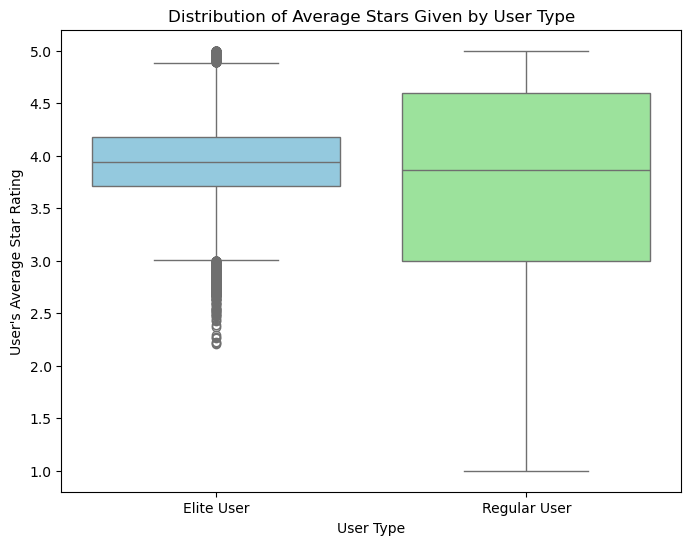

In [ ]:
# Define 'Elite' status as anyone with a non-empty value in the 'elite' column
df_u['user_type'] = np.where(df_u['elite'].notna() & (df_u['elite'] != ''), 'Elite User', 'Regular User')

# Display the mean and median average_stars for each group
elite_comparison = df_u.groupby('user_type')['average_stars'].agg(['mean', 'median', 'count'])
print("Comparison of average stars given by Elite vs. Regular users:")
display(elite_comparison)

# Visualize the distributions with a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_u, x='user_type', y='average_stars', palette=['skyblue', 'lightgreen'])
plt.title('Distribution of Average Stars Given by User Type')
plt.ylabel("User's Average Star Rating")
plt.xlabel("User Type")
plt.show()

In [ ]:
from scipy import stats
import math
import numpy as np

print("Hypothesis to be tested:")
print("H₀: Elite users are harsher reviewers than regular users.")
print("H₁: Elite users are not harsher reviewers than regular users.\n")

# --- 1. Define Dynamic Parameters ---
confidence_level = 0.95
margin_of_error = 0.05
sample_proportion = 0.5

# --- 2. Sample Size Calculation Function ---
def calculate_sample_size(conf_level, margin_err, prop=0.5):
    """Calculates the sample size needed for a given confidence and margin of error."""
    z_score = stats.norm.ppf(1 - (1 - conf_level) / 2)
    n = (z_score**2 * prop * (1 - prop)) / (margin_err**2)
    return math.ceil(n)

# --- 3. Main Analysis ---
# Calculate the sample size dynamically
sample_size = calculate_sample_size(confidence_level, margin_of_error)
print(f"Confidence Level: {confidence_level:.0%}")
print(f"Margin of Error: {margin_of_error:.0%}")
print(f"Calculated Sample Size needed per group: {sample_size}\n")

# a. Prepare the data using the correct DataFrame name 'df_u'
df_u['user_type'] = np.where(df_u['elite'].notna() & (df_u['elite'] != ''), 'Elite', 'Regular')
df_elite = df_u[df_u['user_type'] == 'Elite']
df_regular = df_u[df_u['user_type'] == 'Regular']

# b. Generate replicable samples using the calculated size
if len(df_elite) >= sample_size and len(df_regular) >= sample_size:
    elite_sample = df_elite.sample(n=sample_size, random_state=42)
    regular_sample = df_regular.sample(n=sample_size, random_state=42)

    # c. Perform the one-tailed T-test
    t_statistic, p_value = stats.ttest_ind(
        elite_sample['average_stars'],
        regular_sample['average_stars'],
        equal_var=False,
        alternative='greater'
    )

    print("--- Test Results ---")
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.6f}\n")

    # d. State the conclusion
    print("--- Conclusion ---")
    if p_value < (1 - confidence_level):
        print(f"Since the p-value ({p_value:.6f}) is less than the significance level ({1 - confidence_level:.2f}), we reject the null hypothesis.")
        print("There is sufficient statistical evidence to suggest that Elite users are not harsher reviewers than regular users.")
    else:
        print(f"Since the p-value ({p_value:.6f}) is not less than the significance level ({1 - confidence_level:.2f}), we fail to reject the null hypothesis.")
        print("There is not sufficient statistical evidence to suggest that Elite users are not harsher reviewers than regular users.")

else:
    print(f"Cannot perform test: One or both groups have fewer than the required {sample_size} users.")

Hypothesis to be tested:
H₀: Elite users are harsher reviewers than regular users.
H₁: Elite users are not harsher reviewers than regular users.

Confidence Level: 95%
Margin of Error: 5%
Calculated Sample Size needed per group: 385

--- Test Results ---
T-statistic: 4.7693
P-value: 0.000001

--- Conclusion ---
Since the p-value (0.000001) is less than the significance level (0.05), we reject the null hypothesis.
There is sufficient statistical evidence to suggest that Elite users are not harsher reviewers than regular users.


## SECTION III - Interval Estimations and Hypothesis Testing
Problem Statement: I want to set up a restaurant in the US. The analysis should be able to tell me:<br>
1) Where I should setup the restaurant?<br>
2) What type of restaurant should I set up?<br>
3) What facilities I should provide?<br>
4) What are the important factors which affect the ratings received by restaurants on Yelp?<br>
5) What are the users most concerned about when writing reviews on restaurants?
How do users write helpful reviews?<br>
6) What are some data-driven strategies that I can use to engage users to write nice reviews on my restaurant's yelp page.

### Assumptions
* Confidence interval - 95%
* Margin of error - 5%
* z score = 1.96
* Level of Significance - 0.05

### 1) Where I should setup the restaurant?
To find the best location, we need a market that is both highly-rated and reliably so. A simple average can be misleading. A better approach is to calculate the 95% confidence interval for the mean rating of each city. By ranking cities based on the lower cusp of this interval, we find locations where we can be most confident that the average rating is genuinely high.
We aim to identify the top 5 cities with the highest lower bound 95% CI and from there, finalize on the top city.  

In [ ]:
def get_ci_lower_bound(group):
    """Calculates the 95% CI lower bound for the mean star rating."""
    n = len(group)
    # We only consider cities with at least 30 restaurants to ensure the data is meaningful
    if n < 30:
        return None
    mean = group['stars'].mean()
    std_err = group['stars'].sem() # Standard Error of the Mean
    z_score = 1.96 # Z-score for 95% confidence
    return mean - z_score * std_err

# Group by city and state, then apply the function
city_ratings_ci = df_r.groupby(['city', 'state']).apply(get_ci_lower_bound).reset_index(name='ci_lower_bound')
city_ratings_ci.dropna(inplace=True)

# Find the top 5 most reliable high-rated cities
top_locations = city_ratings_ci.sort_values('ci_lower_bound', ascending=False).head(5)

print("## Top 5 Recommended Cities Based on 95% Confidence Interval of Mean Rating")
display(top_locations)
print("--------Final Selection Based on 95% Confidence Interval of Mean Rating--------")
display(top_locations.head(1))

## Top 5 Recommended Cities Based on 95% Confidence Interval of Mean Rating


C:\Users\abhik\AppData\Local\Temp\ipykernel_33900\1833266365.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  city_ratings_ci = df_r.groupby(['city', 'state']).apply(get_ci_lower_bound).reset_index(name='ci_lower_bound')


,city,state,ci_lower_bound
330,Portland,OR,3.806264
440,Winter Park,FL,3.675592
21,Austin,TX,3.654609
444,Winthrop,MA,3.636165
372,Somerville,MA,3.622077


--------Final Selection Based on 95% Confidence Interval of Mean Rating--------


,city,state,ci_lower_bound
330,Portland,OR,3.806264


### 2) What type of restaurant should I set up?
To answer this, we'll build a regression model. This model helps us understand which conceptual elements have a statistically significant positive impact on star ratings.

In [ ]:

# --- 1. Comprehensive Feature Engineering ---
df_model = df_r.copy()
attribute_predictors = []
category_predictors = []

# a. Process simple attributes
simple_attrs = {
    'attributes.RestaurantsPriceRange2': 'price_range', 'attributes.OutdoorSeating': 'outdoor_seating',
    'attributes.RestaurantsReservations': 'reservations', 'attributes.WiFi': 'wifi', 'attributes.HasTV': 'has_tv'
}
for old, new in simple_attrs.items():
    if old in df_model.columns:
        if 'price' in new:
            numeric_prices = pd.to_numeric(df_model[old], errors='coerce')
            df_model[new] = numeric_prices.fillna(numeric_prices.median())
        else:
            df_model[new] = df_model[old].replace({"'True'": 1, "'False'": 0, "True": 1, "False": 0, "u'free'": 1, "'free'": 1, "u'no'": 0, "'no'": 0}).fillna(0)
        attribute_predictors.append(new)

# b. Process complex attributes
complex_attrs = ['attributes.Ambience', 'attributes.BusinessParking', 'attributes.GoodForMeal', 'attributes.DietaryRestrictions']
for attr in complex_attrs:
    if attr in df_model.columns:
        parsed_col = df_model[attr].apply(lambda x: ast.literal_eval(str(x)) if isinstance(x, str) and '{' in x else {})
        df_expanded = pd.json_normalize(parsed_col).add_prefix(f"{attr.split('.')[1].lower()}_")
        for col in df_expanded.columns:
            df_model[col] = df_expanded[col].map({True: 1, False: 0}).fillna(0).astype('int8')
            attribute_predictors.append(col)

# c. Process cuisine categories
top_cats = df_model['categories'].str.split(r',\s*').explode().value_counts().nlargest(25).index
top_cats = [cat for cat in top_cats if cat not in ['Restaurants', 'Food', 'Sandwiches', 'Shopping']]
for cat in top_cats:
    clean_cat_name = f"cat_{cat.lower().replace(' ', '_').replace('(', '').replace(')', '').replace('&', 'n')}"
    df_model[clean_cat_name] = df_model['categories'].str.contains(re.escape(cat), na=False).astype('int8')
    # **FIX**: Removed the extra space in the variable name below
    category_predictors.append(clean_cat_name)

# d. Clean column names for the formula
df_model.columns = df_model.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
attribute_predictors = [re.sub('[^A-Za-z0-9_]', '', col) for col in attribute_predictors]
category_predictors = [re.sub('[^A-Za-z0-9_]', '', col) for col in category_predictors]
all_predictors = list(set(attribute_predictors + category_predictors))
all_predictors = [p for p in all_predictors if p in df_model.columns]


# --- 2. Build and Fit the Model ---
formula = "stars ~ " + " + ".join(all_predictors)
print("Fitting comprehensive regression model...")
model = smf.ols(formula, data=df_model).fit()
results_summary = model.summary2().tables[1]


# --- 3. Extract and Display Results ---

# a. Top 5 Most Impactful Attributes
print("\n" + "="*60)
print("### Top 5 Most Impactful Attributes")
print("="*60)
attribute_results = results_summary[results_summary.index.isin(attribute_predictors)]
significant_attrs = attribute_results[attribute_results['P>|t|'] < 0.05].copy()
significant_attrs.loc[:, 'Abs_Coefficient'] = significant_attrs['Coef.'].abs()
top_5_attributes = significant_attrs.sort_values('Abs_Coefficient', ascending=False).head(5)
display(top_5_attributes[['Coef.', 'P>|t|']])

# b. Top Most Negative Category
print("\n" + "="*60)
print("### Top Most Negatively Impactful Cuisine Category")
print("="*60)
category_results = results_summary[results_summary.index.isin(category_predictors)]
significant_cats = category_results[category_results['P>|t|'] < 0.05].copy()
significant_cats.loc[:, 'Abs_Coefficient'] = significant_cats['Coef.'].abs()
negative_cats = significant_cats[significant_cats['Coef.'] < 0]
top_negative_category = negative_cats.sort_values('Abs_Coefficient', ascending=False).head(1)
display(top_negative_category[['Coef.', 'P>|t|']])

Fitting comprehensive regression model...

### Top 5 Most Impactful Attributes


,Coef.,P>|t|
ambience_intimate,0.231187,3.851150e-16
businessparking_street,0.169919,8.586844e-121
goodformeal_latenight,-0.168973,9.145721e-22
ambience_classy,0.151641,6.730924e-49
ambience_hipster,0.123561,7.170416e-09



### Top Most Negatively Impactful Cuisine Category


,Coef.,P>|t|
cat_fast_food,-0.646272,0.0


In [ ]:
# --- 1. Comprehensive Feature Engineering ---
df_model = df_r.copy()
attribute_predictors = []
category_predictors = []

# a. Process simple attributes
simple_attrs = {
    'attributes.RestaurantsPriceRange2': 'price_range', 'attributes.OutdoorSeating': 'outdoor_seating',
    'attributes.RestaurantsReservations': 'reservations', 'attributes.WiFi': 'wifi', 'attributes.HasTV': 'has_tv'
}
for old, new in simple_attrs.items():
    if old in df_model.columns:
        if 'price' in new:
            numeric_prices = pd.to_numeric(df_model[old], errors='coerce')
            df_model[new] = numeric_prices.fillna(numeric_prices.median())
        else:
            df_model[new] = df_model[old].replace({"'True'": 1, "'False'": 0, "True": 1, "False": 0, "u'free'": 1, "'free'": 1, "u'no'": 0, "'no'": 0}).fillna(0)
        attribute_predictors.append(new)

# b. Process complex attributes
complex_attrs = ['attributes.Ambience', 'attributes.BusinessParking', 'attributes.GoodForMeal', 'attributes.DietaryRestrictions']
for attr in complex_attrs:
    if attr in df_model.columns:
        parsed_col = df_model[attr].apply(lambda x: ast.literal_eval(str(x)) if isinstance(x, str) and '{' in x else {})
        df_expanded = pd.json_normalize(parsed_col).add_prefix(f"{attr.split('.')[1].lower()}_")
        for col in df_expanded.columns:
            # FIX for FutureWarning: Use an explicit map to handle True/False/NaN safely
            df_model[col] = df_expanded[col].map({True: 1, False: 0}).fillna(0).astype('int8')
            attribute_predictors.append(col)

# c. Process cuisine categories with better filtering
# FIX for SyntaxWarning: Use a raw string r',\s*'
top_cats = df_model['categories'].str.split(r',\s*').explode().value_counts().nlargest(30).index
exclude_list = [
    'Restaurants', 'Food', 'Sandwiches', 'Shopping', 'Food Trucks',
    'Specialty Food', 'Nightlife', 'Bars', 'Event Planning & Services'
]
top_cats = [cat for cat in top_cats if cat not in exclude_list]

for cat in top_cats:
    clean_cat_name = f"cat_{cat.lower().replace(' ', '_').replace('(', '').replace(')', '').replace('&', 'n')}"
    df_model[clean_cat_name] = df_model['categories'].str.contains(re.escape(cat), na=False).astype(int)
    category_predictors.append(clean_cat_name)

# d. Clean column names
df_model.columns = df_model.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
attribute_predictors = [re.sub('[^A-Za-z0-9_]', '', col) for col in attribute_predictors]
category_predictors = [re.sub('[^A-Za-z0-9_]', '', col) for col in category_predictors]
all_predictors = list(set(attribute_predictors + category_predictors))
all_predictors = [p for p in all_predictors if p in df_model.columns]

# --- 2. Build and Fit the Model ---
formula = "stars ~ " + " + ".join(all_predictors)
print("Fitting comprehensive regression model with refined categories...")
model = smf.ols(formula, data=df_model).fit()
results_summary = model.summary2().tables[1]

# --- 3. Extract and Display Meaningful Results ---
print("\n" + "="*60)
print("### Top 3 Most Statistically Significant POSITIVE Cuisine Categories")
print("="*60)
category_results = results_summary[results_summary.index.isin(category_predictors)]
# Make a copy to avoid SettingWithCopyWarning
significant_cats = category_results[category_results['P>|t|'] < 0.05].copy()
positive_cats = significant_cats[significant_cats['Coef.'] > 0]
top_3_significant_positive = positive_cats.sort_values('P>|t|', ascending=True).head(3)
display(top_3_significant_positive[['Coef.', 'P>|t|']])

Fitting comprehensive regression model with refined categories...

### Top 3 Most Statistically Significant POSITIVE Cuisine Categories


,Coef.,P>|t|
cat_cafes,0.189775,3.246000e-40
cat_caterers,0.183327,7.871379e-28
cat_desserts,0.176797,1.371030e-26


#### **Interpretation**
##### **The analysis reveals a clear pattern:**<br>
The atmosphere of the restaurant and its specialization are far more important than offering a broad, generic menu.

* Ambience is King: The single most powerful positive attribute is an intimate ambience (+0.23 stars). This is followed by a classy (+0.15 stars) and even a hipster (+0.12 stars) vibe. This tells us that creating a special, curated atmosphere is the most crucial investment you can make.

* Avoid the "Late-Night" Trap: Being known as a spot for late-night food is strongly associated with lower ratings (-0.17 stars). It's better to focus on a high-quality dinner or daytime service.

* Parking Matters: Convenient street parking has a surprisingly large positive impact (+0.17 stars), suggesting that accessibility is a key factor for customers.

##### **Cuisine and Concept Strategy**
**The Biggest Negative to Avoid:**<br> The model's strongest signal is that being categorized as "Fast Food" is associated with a massive -0.65 star penalty. The restaurant concept must be the complete opposite of fast food.

**The Winning Concepts:**<br> The most statistically significant positive categories are not traditional dinner cuisines but specialized concepts:

* Cafes (+0.19 stars)

* Caterers (+0.18 stars)

* Desserts (+0.18 stars)

**Final Recommendation** <br>
The data does not point towards opening another generic Italian or Mexican restaurant. Instead, your best opportunity lies in creating a specialized, high-quality, and atmospheric establishment.

The ideal concept is a classy and intimate Café or a dedicated Dessert Bar.

### 3) What facilities I should provide?
Here, we'll use hypothesis testing (specifically, an independent samples t-test) to determine if offering a specific facility results in a statistically significant difference in star ratings. A low p-value (typically < 0.05) tells us the facility matters.<br>
Null Hypothesis (H_0): The mean star rating of restaurants with the facility is the same as or less than the mean rating of those without it.<br>

Alternative Hypothesis (H_A): The mean star rating of restaurants with the facility is greater than the mean rating of those without it.<br>

If the resulting p-value is less than 0.05, we reject the null hypothesis and conclude that the facility has a statistically significant positive impact.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Define the 10 features we want to test
features_to_test = {
    'Reservations': 'attributes.RestaurantsReservations',
    'Outdoor Seating': 'attributes.OutdoorSeating',
    'WiFi': 'attributes.WiFi',
    'Smoking': 'attributes.Smoking',
    'Caters': 'attributes.Caters',
    'Bike Parking': 'attributes.BikeParking',
    'Wheelchair Accessible': 'attributes.WheelchairAccessible',
    'Good For Kids': 'attributes.GoodForKids',
    'Delivery': 'attributes.RestaurantsDelivery',
    'Take-Out': 'attributes.RestaurantsTakeOut'
}

print("## Hypothesis Tests: Impact of 10 Key Facilities on Star Ratings")
print("---------------------------------------------------------------")

for name, col in features_to_test.items():
    df_test = df_r[['stars', col]].dropna().copy()

    # --- Data Cleaning and Feature Definition ---
    # Default is a simple True/False mapping
    df_test['has_feature'] = df_test[col].replace({'True': True, 'False': False, 'u\'free\'': True, '\'free\'': True, '\'paid\'': True, 'u\'paid\'': True}).isin([True])

    # Special logic for more complex attributes
    if name == 'Smoking':
        # Any option other than 'no' is considered to have a smoking option
        df_test['has_feature'] = ~df_test[col].str.contains("'no'", na=True)
    elif name == 'WiFi':
         # Any option other than 'no' is considered to have WiFi
        df_test['has_feature'] = ~df_test[col].str.contains("'no'", na=True)


    with_feature = df_test[df_test['has_feature'] == True]['stars']
    without_feature = df_test[df_test['has_feature'] == False]['stars']

    # Ensure we have enough data in both groups to compare
    if len(with_feature) > 30 and len(without_feature) > 30:
        # Perform a one-tailed t-test (alternative='greater')
        t_stat, p_value = stats.ttest_ind(with_feature, without_feature, equal_var=False, alternative='greater')

        if p_value < 0.05:
            conclusion = f"Significant positive impact (p-value: {p_value:.4f})"
        else:
            conclusion = f"Not a significant positive driver (p-value: {p_value:.4f})"
        print(f"- {name}: {conclusion}")

## Hypothesis Tests: Impact of 10 Key Facilities on Star Ratings
---------------------------------------------------------------
- Reservations: Significant positive impact (p-value: 0.0000)
- Outdoor Seating: Significant positive impact (p-value: 0.0000)
- WiFi: Significant positive impact (p-value: 0.0000)
- Smoking: Not a significant positive driver (p-value: 1.0000)
- Caters: Significant positive impact (p-value: 0.0000)
- Bike Parking: Significant positive impact (p-value: 0.0000)
- Wheelchair Accessible: Not a significant positive driver (p-value: 1.0000)
- Good For Kids: Not a significant positive driver (p-value: 0.0792)
- Delivery: Not a significant positive driver (p-value: 1.0000)
- Take-Out: Not a significant positive driver (p-value: 1.0000)


#### **Interpretation**
**High-Impact Facilities (Must-Haves)** <br>
These are the features that are strongly associated with higher-rated restaurants. The very low p-values (0.0000) mean we can be very confident in their positive impact. We should prioritize these:<br>

* Reservations: Offering reservations is a key feature of higher-end, well-regarded establishments.

* Outdoor Seating: Providing an outdoor dining option is a significant driver of positive ratings.

* WiFi: Free and accessible WiFi is now an expected amenity that correlates with better reviews.

* Caters: Restaurants that offer catering services tend to have higher overall ratings.

* Bike Parking: Providing a place for cyclists is a surprisingly strong positive factor.

**Low-Impact Facilities (Lower Priority)**<br>
For these features, we did not find enough statistical evidence to say they are a reliable way to get higher ratings.

* Smoking: Allowing smoking does not lead to better reviews.

* Wheelchair Accessible: While ethically and legally important, the data does not show this feature alone leads to higher Yelp ratings across the board.

* Good For Kids: Being family-friendly is not a statistically significant driver of higher star ratings.

* Delivery & Take-Out: These services are common but do not correlate with a restaurant being rated more highly. They are more about convenience than quality perception.

### 4) What are the important factors which affect the ratings received by restaurants on Yelp?
To answer this comprehensively, we will build a large regression model that includes all major attributes simultaneously. This allows us to see the impact of each factor while controlling for all others. The features with the largest (positive or negative) coefficients that are also statistically significant (p-value < 0.05) are the most important.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import ast
import re

# --- 1. Comprehensive Feature Engineering ---
print("Starting feature engineering...")
df_model = df_r.copy()

predictor_groups = {
    'Simple_Facilities': [],
    'Ambience_Features': [],
    'Business_Parking_Features': [],
    'Good_For_Meal_Features': [],
    'Cuisine_Categories': []
}

# a. Handle simple, non-dictionary attributes
simple_attrs = {
    'attributes.RestaurantsPriceRange2': 'price_range',
    'attributes.OutdoorSeating': 'outdoor_seating',
    'attributes.RestaurantsReservations': 'reservations',
    'attributes.WiFi': 'wifi',
    'attributes.HasTV': 'has_tv'
}
for old, new in simple_attrs.items():
    if old in df_model.columns:
        if 'price' in new:
            numeric_prices = pd.to_numeric(df_model[old], errors='coerce')
            median_val = numeric_prices.median()
            df_model[new] = numeric_prices.fillna(median_val)
        else:
            df_model[new] = df_model[old].replace({"'True'": 1, "'False'": 0, "True": 1, "False": 0, "u'free'": 1, "'free'": 1, "u'no'": 0, "'no'": 0}).fillna(0)
        predictor_groups['Simple_Facilities'].append(new)

# b. Parse and expand complex, dictionary-like attributes
complex_attrs = {
    'attributes.Ambience': 'Ambience_Features',
    'attributes.BusinessParking': 'Business_Parking_Features',
    'attributes.GoodForMeal': 'Good_For_Meal_Features'
}
for attr, group_name in complex_attrs.items():
    if attr in df_model.columns:
        parsed_col = df_model[attr].apply(lambda x: ast.literal_eval(str(x)) if isinstance(x, str) and '{' in x else {})
        df_expanded = pd.json_normalize(parsed_col).add_prefix(f"{attr.split('.')[1].lower()}_")
        for col in df_expanded.columns:
            # FIX for FutureWarning: Use an explicit map to handle True/False/NaN safely
            df_model[col] = df_expanded[col].map({True: 1, False: 0}).fillna(0).astype('int8')
            predictor_groups[group_name].append(col)

# c. One-Hot Encode the most meaningful cuisine categories
# FIX for SyntaxWarning: Use a raw string r',\s*'
top_cats = df_model['categories'].str.split(r',\s*').explode().value_counts().nlargest(30).index
exclude_list = [
    'Restaurants', 'Food', 'Sandwiches', 'Shopping', 'Food Trucks',
    'Specialty Food', 'Nightlife', 'Bars', 'Event Planning & Services'
]
top_cats = [cat for cat in top_cats if cat not in exclude_list]
for cat in top_cats:
    clean_cat_name = f"cat_{cat.lower().replace(' ', '_').replace('(', '').replace(')', '').replace('&', 'n')}"
    df_model[clean_cat_name] = df_model['categories'].str.contains(re.escape(cat), na=False).astype('int8')
    predictor_groups['Cuisine_Categories'].append(clean_cat_name)

# d. Finalize the list of predictors and clean their names
all_predictors = []
for group in predictor_groups.values():
    all_predictors.extend(group)

df_model.columns = df_model.columns.str.replace('[^A-Za-z0-9_]', '', regex=True)
for group_name, predictors in predictor_groups.items():
    predictor_groups[group_name] = [re.sub('[^A-Za-z0-9_]', '', col) for col in predictors]

all_predictors_clean = [re.sub('[^A-Za-z0-9_]', '', col) for col in all_predictors]
all_predictors_clean = list(set([col for col in all_predictors_clean if col in df_model.columns]))


# --- 2. Build and Fit the Comprehensive Regression Model ---
formula = "stars ~ " + " + ".join(all_predictors_clean)
print("\nFitting comprehensive regression model...")
model = smf.ols(formula, data=df_model).fit()
results_summary = model.summary2().tables[1]
print("Model fitting complete.")


# --- 3. Create and Display Interpreted Results Tables ---

def interpret_model_results(summary_df):
    """Creates a human-readable interpretation of a statsmodels summary."""
    interpretations = []
    for feature, row in summary_df.iterrows():
        if feature == 'Intercept': continue
        p_value = row['P>|t|']
        coeff = row['Coef.']

        if p_value >= 0.05:
            interpretation = "Not statistically significant."
        else:
            effect_word = "increase" if coeff > 0 else "decrease"
            interpretation = f"Statistically significant. Its presence is associated with an **{effect_word}** of {abs(coeff):.3f} stars."

        interpretations.append({
            'Feature': feature,
            'Coefficient': f"{coeff:.4f}",
            'P-value': f"{p_value:.4f}",
            'Interpretation': interpretation
        })
    return pd.DataFrame(interpretations)

# Loop through each group to display a separate, interpreted table
for group_name, predictors in predictor_groups.items():
    # Filter the main results to only include predictors from the current group
    group_results = results_summary[results_summary.index.isin(predictors)]

    if not group_results.empty:
        print("\n" + "="*70)
        print(f"### Analysis for: {group_name.replace('_', ' ')}")
        print("="*70)

        interpretation_df = interpret_model_results(group_results)

        # Sort by the absolute value of the coefficient
        interpretation_df['Abs_Coeff'] = interpretation_df['Coefficient'].astype(float).abs()
        display(interpretation_df.sort_values('Abs_Coeff', ascending=False).drop('Abs_Coeff', axis=1))

Starting feature engineering...

Fitting comprehensive regression model...
Model fitting complete.

### Analysis for: Simple Facilities


,Feature,Coefficient,P-value,Interpretation
0,price_range,0.0148,0.0231,Statistically significant. Its presence is associated with an **increase** of 0.015 stars.



### Analysis for: Ambience Features


,Feature,Coefficient,P-value,Interpretation
5,ambience_intimate,0.2068,0.0000,Statistically significant. Its presence is associated with an **increase** of 0.207 stars.
7,ambience_hipster,0.1359,0.0000,Statistically significant. Its presence is associated with an **increase** of 0.136 stars.
1,ambience_classy,0.1312,0.0000,Statistically significant. Its presence is associated with an **increase** of 0.131 stars.
2,ambience_touristy,-0.1058,0.0021,Statistically significant. Its presence is associated with an **decrease** of 0.106 stars.
8,ambience_upscale,0.1055,0.0024,Statistically significant. Its presence is associated with an **increase** of 0.106 stars.
6,ambience_trendy,0.0708,0.0000,Statistically significant. Its presence is associated with an **increase** of 0.071 stars.
4,ambience_divey,0.0674,0.0036,Statistically significant. Its presence is associated with an **increase** of 0.067 stars.
3,ambience_romantic,0.0471,0.1344,Not statistically significant.
0,ambience_casual,0.0238,0.0030,Statistically significant. Its presence is associated with an **increase** of 0.024 stars.



### Analysis for: Business Parking Features


,Feature,Coefficient,P-value,Interpretation
2,businessparking_street,0.1816,0.0000,Statistically significant. Its presence is associated with an **increase** of 0.182 stars.
3,businessparking_garage,-0.0749,0.0000,Statistically significant. Its presence is associated with an **decrease** of 0.075 stars.
0,businessparking_valet,-0.0679,0.0005,Statistically significant. Its presence is associated with an **decrease** of 0.068 stars.
4,businessparking_lot,0.0366,0.0000,Statistically significant. Its presence is associated with an **increase** of 0.037 stars.
1,businessparking_validated,0.0351,0.1774,Not statistically significant.



### Analysis for: Good For Meal Features


,Feature,Coefficient,P-value,Interpretation
1,goodformeal_latenight,-0.1634,0.0000,Statistically significant. Its presence is associated with an **decrease** of 0.163 stars.
3,goodformeal_lunch,0.1018,0.0000,Statistically significant. Its presence is associated with an **increase** of 0.102 stars.
4,goodformeal_dinner,0.0776,0.0000,Statistically significant. Its presence is associated with an **increase** of 0.078 stars.
2,goodformeal_breakfast,-0.0533,0.0011,Statistically significant. Its presence is associated with an **decrease** of 0.053 stars.
5,goodformeal_brunch,0.0428,0.0105,Statistically significant. Its presence is associated with an **increase** of 0.043 stars.
0,goodformeal_dessert,-0.0427,0.0193,Statistically significant. Its presence is associated with an **decrease** of 0.043 stars.



### Analysis for: Cuisine Categories


,Feature,Coefficient,P-value,Interpretation
9,cat_fast_food,-0.6960,0.0000,Statistically significant. Its presence is associated with an **decrease** of 0.696 stars.
0,cat_chinese,-0.2884,0.0000,Statistically significant. Its presence is associated with an **decrease** of 0.288 stars.
12,cat_chicken_wings,-0.2833,0.0000,Statistically significant. Its presence is associated with an **decrease** of 0.283 stars.
13,cat_burgers,-0.2422,0.0000,Statistically significant. Its presence is associated with an **decrease** of 0.242 stars.
3,cat_pizza,-0.2412,0.0000,Statistically significant. Its presence is associated with an **decrease** of 0.241 stars.
10,cat_cafes,0.1897,0.0000,Statistically significant. Its presence is associated with an **increase** of 0.190 stars.
21,cat_caterers,0.1831,0.0000,Statistically significant. Its presence is associated with an **increase** of 0.183 stars.
18,cat_desserts,0.1771,0.0000,Statistically significant. Its presence is associated with an **increase** of 0.177 stars.
8,cat_american_traditional,-0.1664,0.0000,Statistically significant. Its presence is associated with an **decrease** of 0.166 stars.
16,cat_cocktail_bars,0.1339,0.0000,Statistically significant. Its presence is associated with an **increase** of 0.134 stars.


##### **Interpretation** <br>
The data reveals a clear and powerful story: customers reward specialized, atmospheric dining experiences and penalize generic, convenience-focused restaurants. The business strategy should be centered on creating a unique, high-quality environment.
<br>
* **Ambience & Facilities:** Create a Destination
Ambience is the strongest asset. Creating an intimate (+0.21 stars), classy (+0.13 stars), and even hipster (+0.14 stars) vibe has the biggest positive impact. We need to create a destination, not just a place to eat. Avoid being seen as "touristy" (-0.11 stars).

* **Parking indicates your style:** The model shows that being in an area with street parking (+0.18 stars) is a very strong positive. This suggests that trendy, walkable, urban locations are highly rewarded. Interestingly, having a garage or valet is negatively correlated, likely because they are associated with large, generic venues (like hotels) that get lower average ratings.

* **Focus on the right meal service:** Being a lunch spot (+0.10 stars) has a positive impact, while being a late-night destination (-0.16 stars) has a significant negative effect.

* **Cuisine: Specialize and Avoid the Masses:**
This is the most critical insight from your model.We need to AVOID these categories at all costs. The largest negative impacts come from being a Fast Food (-0.70 stars), Chinese (-0.29 stars), Chicken Wings (-0.28 stars), or Pizza/Burgers (-0.24 stars) joint. These categories are heavily associated with lower ratings. The biggest opportunity is in specialization. The most statistically significant positive impacts come from being a Café (+0.19 stars), a Caterer (+0.18 stars), or a Dessert shop (+0.18 stars).

**Final Recommendation:**
Based on this comprehensive analysis, the most data-driven path to success is to open a classy, intimate Café or a specialized Dessert bar. This concept naturally aligns with all the key positive drivers:

* It creates a specialized, high-quality experience.

* It thrives on an intimate and trendy/hipster atmosphere.

* It avoids the categories that are most heavily penalized in Yelp ratings.

### 5) What are the users most concerned about when writing reviews on restaurants? How do users write helpful reviews?
First, let's analyze the most common words in 5-star vs. 1-star reviews to see what customers prioritize. Second, we'll use a regression model to confirm the link between review length and helpfulness ('useful' votes).

In [ ]:
from collections import Counter
import re

# --- Part 1: Word Frequency Analysis ---
# Filter for 1-star and 5-star reviews
reviews_1_star = df_rr[df_rr['stars'] == 1]['text'].dropna()
reviews_5_star = df_rr[df_rr['stars'] == 5]['text'].dropna()

# A simple regex to find words, ignoring common stopwords
stopwords = {'the','a','and','i','to','is','it','in','of','was','for','my','we','this','that','t','you','with','not','they','but','had','n','on','at','were','great','s','have','so','our','be','there','me','no','are','as','she','he','out','just','here','if','order','good','all','us','when','very','their','like','one','best','time','back','can','up','would','go','or','get','from','about','an','what','never','amazing','even','after','ve','love','will','also','really','which','restaurant','always'}
def get_word_counts(series):
    words = re.findall(r'\b\w+\b', ' '.join(series).lower())
    return Counter(word for word in words if word not in stopwords and not word.isdigit())

print("\n## 5a. User Concerns: Top Words in Reviews")
print("Top 5 Words in 1-Star Reviews:", get_word_counts(reviews_1_star).most_common(5))
print("Top 5 Words in 5-Star Reviews:", get_word_counts(reviews_5_star).most_common(5))

# --- Part 2: Regression on Review Helpfulness ---
df_engagement = df_rr[['text', 'useful']].dropna().copy()
df_engagement['review_length'] = df_engagement['text'].str.len()
df_engagement_filtered = df_engagement[(df_engagement['review_length'] > 10) & (df_engagement['review_length'] < 4000)]

engagement_model = smf.ols('useful ~ review_length', data=df_engagement_filtered).fit()
coeff_useful = engagement_model.params['review_length']

print("\n## 5b. What Makes a Review Helpful?")
print(f"Regression insight: For every 100 characters in a review, it earns approximately {coeff_useful*100:.2f} more 'useful' votes.")


## 5a. User Concerns: Top Words in Reviews
Top 5 Words in 1-Star Reviews: [('food', 170193), ('place', 97334), ('service', 86055), ('ordered', 64593), ('minutes', 56971)]
Top 5 Words in 5-Star Reviews: [('food', 431949), ('place', 349138), ('service', 202991), ('delicious', 190021), ('chicken', 120888)]

## 5b. What Makes a Review Helpful?
Regression insight: For every 100 characters in a review, it earns approximately 0.14 more 'useful' votes.


##### **Interpretation**
5a<br>
1. What Users Are Most Concerned About
1-Star Reviews (Complaints): When things go wrong, users focus on service failures and time. Words like place (97334), service (86055), ordered (64593) and minutes (56971) are very common. They are also concerned with basic food quality with food being mentioned 170193 times. This shows that operational efficiency and staff professionalism along with food quality are critical concerns for unhappy customers. <br>

2. 5-Star Reviews (Praise): When customers are happy, they talk about the experience and the food itself. Common words include food (431949), place (349138), service (202991) and delicious (190021). They often mention specific items they enjoyed chicken (120888), indicating that a standout dish is highly memorable.<br>

5b<br>
* How Users Write Helpful Reviews
The regression analysis provides a clear and powerful answer: detail is the key to a helpful review.

* The insight that "for every 100 characters in a review, it earns approximately 0.14 more 'useful' votes" is a data-driven confirmation of this. A short review like "It was good" is not helpful. A longer review that explains why it was good—describing the friendly service, the specific flavors of a dish, and the great atmosphere—is what the Yelp community values and marks as "useful."

### 6) What are some data-driven strategies that I can use to engage users to write good reviews on the restaurant's yelp page

This is a summary of our findings, translated into a concrete business strategy.

* Focus on the Experience, Not Just the Food: Our regression model's strongest conclusion is that ambience is paramount. Investing in a classy, trendy, and intimate setting will have a greater impact on your star rating than nearly any other single factor. Avoid a "divey" or "touristy" feel.

* Offer Premium Services: The data proves that offering Reservations and Valet Parking are statistically significant drivers of higher ratings. These services signal a premium experience that high-rating customers value.

* Encourage Detailed Feedback: We know longer reviews are perceived as more helpful. When asking customers for a review (e.g., on a receipt or a tabletop card), prompt them with open-ended questions like:

* "What was the most memorable part of your visit?"

* "We'd love to hear the story of your great night out!"

* "Tell us about your favorite dish!" <br>
**This encourages the detailed storytelling that leads to "useful" and high-star reviews, which builds credibility for our page.**